<a href="https://colab.research.google.com/github/MtHenriqueF/GA-Rastrigin-1/blob/configuracoes-diversas/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montando Drive

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import os

WORKDIR = '/content/drive/MyDrive/GA'

os.chdir(WORKDIR)
print('Diretório atual:', os.getcwd())


Diretório atual: /content/drive/MyDrive/GA


---
# Enunciado

O problema para o segundo trabalho de GA é definido pela função Rastrigin [1] é uma função
não convexa usada como um problema de teste de desempenho para algoritmos de
otimização.

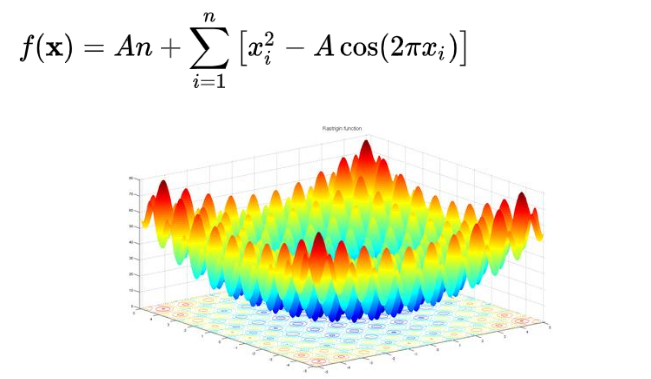

In [61]:
path = '/content/drive/MyDrive/GA/GA.png'
from PIL import Image
Image.open(path)


- **O objetivo é avaliar e testar todos os parâmetros do Algoritmo Genético para encontrar a função de mínimo para o problema no menor tempo possível, ou seja, com a menor quantidade de gerações.** O código em Python desenvolvido a partir da biblioteca *geneticalgorithm2* também está disponível.

- Fundamental, a inclusão de **tabelas que descrevam os parâmetros e valores avaliados desses parâmetros**, além dos resultados obtidos nos testes. Os **gráficos** devem ser anexados para justificar as respostas.

- Também recomendo que não alterem mais de um parâmetro por vez para evitar avaliações indevidas. Fundamental que façam comentários a respeito dos resultados obtidos!

---
# Informações sobre o trabalho

- Biblioteca do trabalho2
[geneticalgorithm2](https://pypi.org/project/geneticalgorithm2)

- Parâmetros do GA
[parametros-ga](https://github.com/PasaOpasen/geneticalgorithm2)


- Informação funções matemáticas
  - https://github.com/PasaOpasen/OptimizationTestFunctions#rastrigin
  - https://github.com/PasaOpasen/geneticalgorithm2

- Outra biblioteca de GA.
https://pypi.org/project/deap/

---
## Estrutura global do algoritmo - segundo biblioteca

```python
# Pre-process: making inner functions depends on params, making/loading start population

while True:

    if reason to stop (time is elapsed / no progress / generation count is reached / min value is reached):
        break


    select parents to crossover from last population and put them to new population:
        select (elit count) best samples
        select (parents count - elit count) random samples (by selection function)

    create (total samples count - parents count) children (samples from selected parents) and put them to new population:
        while not all children are created:
            select 2 random parents
            make child1, child2 from them using crossover
            mutate child1 by mutation (model.mut)
            mutate child2 by middle mutation (model.mut_middle)
            put children to new population
    
    remove duplicates, make revolutions, sort population by scores
    use callbacks, use middle callbacks

# Post-process: plotting results, saving
```

---
# Instalando dependências

In [62]:
!pip install geneticalgorithm2

In [63]:
!pip install geneticalgorithm2[full]

---
# Interpretando enunciado e definindo os parâmetros essenciais

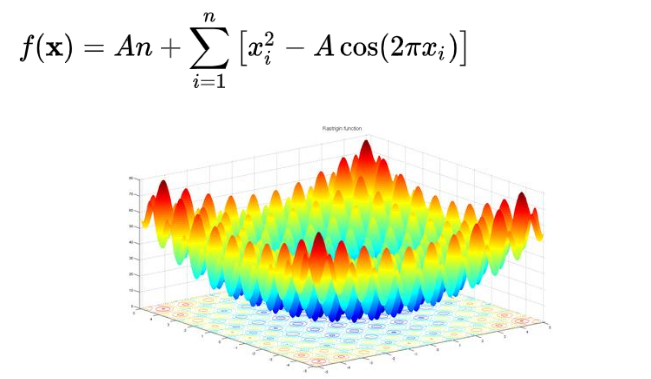

In [64]:
path = '/content/drive/MyDrive/GA/GA.png'
from PIL import Image
Image.open(path)


O enunciado pede para minimizar a funcão e o seu gráfico é 3D e F(x) tem dimensão 1A, então a dimensão de x é 2 ou seja, nossos cromossomos tem 2 'casas' reais.

Com base no enunciado e sabendo que x não tem restrições podemos também escrever a funcão que define a nossa avaliação, que será normalizada e virará aptidao.

O valor padrão e universalmente aceito para o parâmetro A na função de Rastrigin é 10. Portanto podemos definir a funcão de avaliação para nosso problema:


In [65]:
A = 10
n = 2

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm2 import GeneticAlgorithm2 as ga

A = 10

def rastrigin_function(X):
    n_dim = len(X)
    termo_quadratico = np.sum(X**2)
    termo_cosseno = np.sum(A * np.cos(2 * np.pi * X))
    return A * n_dim + termo_quadratico - termo_cosseno


Por definição x de [Rastrigin](https://en.wikipedia.org/wiki/Rastrigin_function)
varia entre [-5.12, 5.12] então já podemos definir varbound também


In [67]:
varbound = np.array([[-5.12, 5.12]] * n)

Além disso, variable_type='real', por definição também.


---
# Exemplificando com 1 experimento

Somento para efeitos de exemplificação da biblioteca geneticalgorithm2 para 1 experimento.

Iniciando o Algoritmo Genético...

Set: Average time of function evaluating (secs): 2.8368234634399414e-05 (total = 0.005673646926879883)

Best score before optimization: 3.477332111483328
||__________________ 8.3% GA is running...10 gen from 120...best value = 1.091070061867061

/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:197: UserWarning: function is deprecated in init constructor and will be removed in version 7. Move this argument to run() method
  warnings.warn(


                                                                                                                                                                                                        
 The best found solution:
 [ 0.01148543 -0.00564444]

 Objective function:
 0.03247966593507812

 Used generations: 120
 Used time: 2.07 seconds


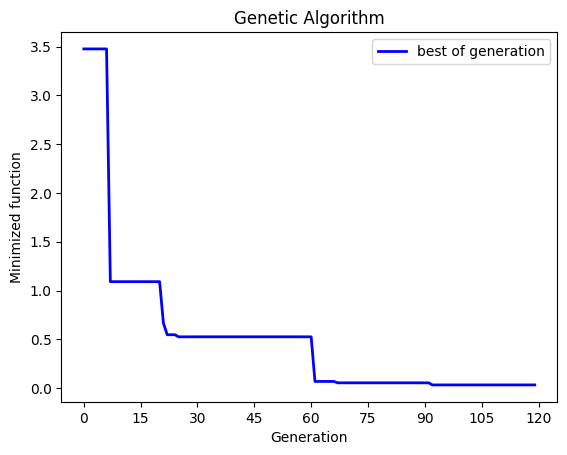

GAResult(last_generation=Generation(variables=array([[ 0.01148543, -0.00564444],
       [ 0.01148543,  0.01183478],
       [ 0.01767419, -0.00564444],
       [ 0.01767419, -0.01665388],
       [ 0.01148543,  0.03878815],
       [ 0.05138678, -0.00564444],
       [ 0.05138678,  0.01183478],
       [ 0.05138678, -0.01665388],
       [ 0.01148543, -0.05551828],
       [ 0.01767419, -0.05551828],
       [ 0.01148543,  0.05769053],
       [ 0.05138678,  0.03878815],
       [-0.05200963,  0.03878815],
       [-0.99485219, -0.00564444],
       [ 0.99082356, -0.00564444],
       [-0.98859494, -0.00564444],
       [ 0.99082356,  0.01183478],
       [ 0.01148543, -1.00204638],
       [ 0.01148543, -0.98736534],
       [-0.99347334, -0.01665388],
       [-0.97637267, -0.00564444],
       [-0.97637267,  0.01183478],
       [-0.97220684, -0.00564444],
       [-0.05200963,  0.05769053],
       [ 0.01148543, -1.02395636],
       [ 0.01767419, -1.02395636],
       [-0.95719755, -0.99394661],
       [-

In [68]:
import numpy as np
from geneticalgorithm2 import GeneticAlgorithm2 as ga
from geneticalgorithm2 import Selection

A = 10
n = 2

varbound = np.array([[-5.12, 5.12]] * n)

# CONFIGURAÇÃO DOS PARÂMETROS DO ALGORITMO GENÉTICO

algorithm_param = {
    'max_num_iteration': 120,                #Número de gerações
    'population_size': 200,                 #Tamanho da população

    'mutation_probability': 0.01,           #Probabilidade de mutação de 1%
    'mutation_type': 'gauss_by_x',          #Tipo de mutação 'gaussian' (creep)

    'crossover_probability': 0.65,          #Probabilidade de crossover de 65%
    'crossover_type': 'uniform',            #Tipo de crossover 'uniform'

    'elit_ratio': 0.10,                     #10% de elitismo (steady state)
    'parents_portion': 0.9,                 #90% da população pode ser selecionada como pais

    'selection_type': 'tournament',         #Seleção por torneio
}

model = ga(
    dimension=n,
    variable_type='real',
    variable_boundaries=varbound,
    algorithm_parameters=algorithm_param,
    function=rastrigin_function
)

#Executando o algoritmo genético
#O parâmetro para remover duplicatas é passado no método run()

print("Iniciando o Algoritmo Genético...")
model.run(
    remove_duplicates_generation_step=1 #Remove duplicatas a cada 1 geração ("Sem duplicatas")
)



### valor de $(x, y, f(x,y))$ para melhor solução

In [69]:

solution = model.result

print(f"Melhor Score (Valor da Função): {solution.score}")
print(f"Melhor Solução (Vetor X): {solution.variable}")


Melhor Score (Valor da Função): 0.03247966593507812
Melhor Solução (Vetor X): [ 0.01148543 -0.00564444]


### Solução para cada geração e o melhor resultado

In [70]:
solution

GAResult(last_generation=Generation(variables=array([[ 0.01148543, -0.00564444],
       [ 0.01148543,  0.01183478],
       [ 0.01767419, -0.00564444],
       [ 0.01767419, -0.01665388],
       [ 0.01148543,  0.03878815],
       [ 0.05138678, -0.00564444],
       [ 0.05138678,  0.01183478],
       [ 0.05138678, -0.01665388],
       [ 0.01148543, -0.05551828],
       [ 0.01767419, -0.05551828],
       [ 0.01148543,  0.05769053],
       [ 0.05138678,  0.03878815],
       [-0.05200963,  0.03878815],
       [-0.99485219, -0.00564444],
       [ 0.99082356, -0.00564444],
       [-0.98859494, -0.00564444],
       [ 0.99082356,  0.01183478],
       [ 0.01148543, -1.00204638],
       [ 0.01148543, -0.98736534],
       [-0.99347334, -0.01665388],
       [-0.97637267, -0.00564444],
       [-0.97637267,  0.01183478],
       [-0.97220684, -0.00564444],
       [-0.05200963,  0.05769053],
       [ 0.01148543, -1.02395636],
       [ 0.01767419, -1.02395636],
       [-0.95719755, -0.99394661],
       [-

---
# Generalizando o algoritmo genético para n experimentos

Para n experimento o essencial é descobrir o melhor de cada geração de cada experimento, com isso conseguimos decidir qual hiperparametrização utilizar ao final.

 As funções abaixo serão para criação de gráficos e das tabelas que serão úteis para comparar os hiperparâmetros

A funcão abaixo será utilizada nas outras configurações de hiperâparametro também. Ela funciona para generalizar o código retornando um tabela pandas com os melhores indivíduos por geração em cada experimento. Isso será útil para plotar os gráficos e decidir qual configuração usar na hora de podar o número de gerações.

In [71]:

def executar_experimentos(algorithm_param, n_dim, num_experimentos=10):
    """
    Executa o Algoritmo Genético várias vezes e retorna os resultados em uma tabela pandas.
    """
    resultados_dict = {}
    varbound = np.array([[-5.12, 5.12]] * n_dim)

    print(f"Iniciando bateria de {num_experimentos} experimentos com dimensão n={n_dim}...")

    for i in range(1, num_experimentos + 1):

        model = ga(
            dimension=n_dim,
            variable_type='real',
            variable_boundaries=varbound,
            algorithm_parameters=algorithm_param,
        )

        model.run(
            function=rastrigin_function,
            remove_duplicates_generation_step=1,
            no_plot=True,
            progress_bar_stream=None,
            disable_printing=True
        )

        resultados_dict[f"Experimento_{i}"] = model.report


    df_resultados = pd.DataFrame(resultados_dict)
    df_resultados.index = np.arange(1, len(df_resultados) + 1)
    df_resultados.index.name = "Geração"

    return df_resultados

funcao de plotagem dos gráficos de
1. Média do Melhor Valor de f(x) por Geração
2. Box Plot do Melhor Valor de f(x) por Geração

In [72]:
def plotar_resultados_experimentos(df_resultados, titulo_experimento):
    """
    Gera dois gráficos (média e box plot) a partir de uma tabela de resultados.

    Args:
        df_resultados (pd.DataFrame): A tabela com gerações nas linhas e experimentos nas colunas.
        titulo_experimento (str): Um título descritivo para a configuração testada.
    """

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

    # --- Gráfico 1: Média do Melhor Valor de f(x) por Geração ---
    media_por_geracao = df_resultados.mean(axis=1)

    ax1.plot(media_por_geracao.index, media_por_geracao.values, marker='o', linestyle='-')
    ax1.set_title('Média do Melhor Valor de f(x) por Geração', fontsize=14)
    ax1.set_xlabel('Geração', fontsize=12)
    ax1.set_ylabel('Valor Médio de f(x)', fontsize=12)
    ax1.grid(True)

    # --- Gráfico 2: Box Plot do Melhor Valor de f(x) por Geração ---
    geracoes_para_plotar = df_resultados.iloc[::5, :]

    ax2.boxplot(geracoes_para_plotar.transpose())
    ax2.set_title('Box Plot do Melhor Valor de f(x) (a cada 5 gerações)', fontsize=14)
    ax2.set_xlabel('Geração', fontsize=12)
    ax2.set_ylabel('Distribuição dos Melhores Valores de f(x)', fontsize=12)

    ax2.set_xticks(
        ticks=np.arange(1, len(geracoes_para_plotar) + 1),
        labels=geracoes_para_plotar.index,
        rotation=45
    )
    ax2.grid(True, linestyle='--', alpha=0.6)

    fig.suptitle(f'Resultados para o Teste: "{titulo_experimento}"', fontsize=18)

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta o layout para o supertítulo caber
    plt.show()


Função para obter o melhor resultado dos experimentos

In [73]:
def obter_melhor_resultado_geral(df_resultados):

    ultima_geracao = df_resultados.iloc[-1]

    melhor_score = ultima_geracao.min()

    melhor_experimento = ultima_geracao.idxmin()

    return {'score': melhor_score, 'experimento': melhor_experimento}

Função para obter a média dos melhores resultados (pegar a última geração de cada experimento e tirar média).

In [74]:
def calcular_media_resultados_finais(df_resultados):

    ultima_geracao = df_resultados.iloc[-1]

    media_scores = ultima_geracao.mean()

    desvio_padrao = ultima_geracao.std()

    return {'media': media_scores, 'desvio_padrao': desvio_padrao}

A Função abaixo tem como intuito gerar 2 gráficos de comparação entre os hiperparâmetros, isso será útil para dizer de maneira mais clara quem teve o melhor desempenho.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm2 import GeneticAlgorithm2 as ga


def plotar_comparacao_configuracoes(df_config1, df_config2, label_config1, label_config2):
    """
    Gera gráficos comparando a performance de duas configurações de AG.

    Args:
        df_config1 (pd.DataFrame): Tabela de resultados da primeira configuração.
        df_config2 (pd.DataFrame): Tabela de resultados da segunda configuração.
        label_config1 (str): Rótulo para a primeira configuração (para a legenda).
        label_config2 (str): Rótulo para a segunda configuração (para a legenda).
    """

    media_config1 = df_config1.mean(axis=1)
    media_config2 = df_config2.mean(axis=1)

    # Cria uma figura com 2 subplots (2 linhas, 1 coluna)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 14))

    # --- Gráfico 1: Comparação Completa da Convergência Média ---
    ax1.plot(media_config1.index, media_config1.values, marker='.', linestyle='-', label=label_config1)
    ax1.plot(media_config2.index, media_config2.values, marker='.', linestyle='--', label=label_config2)
    ax1.set_title('Comparação Completa da Convergência Média', fontsize=14)
    ax1.set_xlabel('Geração', fontsize=12)
    ax1.set_ylabel('Valor Médio de f(x)', fontsize=12)
    ax1.legend()
    ax1.grid(True)

    # --- Gráfico 2: Comparação da Convergência Final (f(x) < 0.5) ---
    # Encontra a primeira geração em que qualquer uma das configs ficou abaixo de 0.5
    try:
        start1 = media_config1[media_config1 < 0.5].index[0]
    except IndexError:
        start1 = np.inf # Se nunca atingiu, define como infinito
    try:
        start2 = media_config2[media_config2 < 0.5].index[0]
    except IndexError:
        start2 = np.inf

    start_gen = min(start1, start2)

    if start_gen == np.inf:
        ax2.text(0.5, 0.5, 'Nenhuma configuração atingiu f(x) < 0.5',
                 ha='center', va='center', fontsize=14, color='red')
    else:
        zoom_media1 = media_config1[start_gen-1:] # -1 para incluir o ponto de partida
        zoom_media2 = media_config2[start_gen-1:]

        ax2.plot(zoom_media1.index, zoom_media1.values, marker='o', linestyle='-', label=label_config1)
        ax2.plot(zoom_media2.index, zoom_media2.values, marker='x', linestyle='--', label=label_config2)

    ax2.set_title('Comparação da Convergência Final (Zoom em f(x) < 0.5)', fontsize=14)
    ax2.set_xlabel('Geração', fontsize=12)
    ax2.set_ylabel('Valor Médio de f(x)', fontsize=12)
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()



A função abaixo compara os boxplot's de 2 algoritmos GA.

In [76]:
# Adicione esta importação no início do seu script
import seaborn as sns

def plotar_boxplot_comparativo(df_config1, df_config2, label_config1, label_config2):
    """
    Gera um único gráfico de boxplot comparando duas configurações de AG.

    Args:
        df_config1 (pd.DataFrame): Tabela de resultados da primeira configuração.
        df_config2 (pd.DataFrame): Tabela de resultados da segunda configuração.
        label_config1 (str): Rótulo para a primeira configuração.
        label_config2 (str): Rótulo para a segunda configuração.
    """

    print("Reorganizando dados para o boxplot comparativo...")

    # --- Passo 1: Selecionar e preparar os dados de cada configuração ---
    # Selecionamos a cada 10 gerações para o gráfico não ficar muito cheio
    dados_c1 = df_config1.iloc[::10, :].reset_index()
    dados_c2 = df_config2.iloc[::10, :].reset_index()

    # "Derretemos" (melt) a tabela para o formato longo
    dados_c1_longo = dados_c1.melt(id_vars=['Geração'], var_name='Experimento', value_name='Valor_f(x)')
    dados_c2_longo = dados_c2.melt(id_vars=['Geração'], var_name='Experimento', value_name='Valor_f(x)')

    # Adicionamos a coluna que identifica a configuração
    dados_c1_longo['Configuração'] = label_config1
    dados_c2_longo['Configuração'] = label_config2

    # --- Passo 2: Combinar tudo em um único DataFrame ---
    df_combinado = pd.concat([dados_c1_longo, dados_c2_longo])

    # --- Passo 3: Gerar o Gráfico com Seaborn ---
    print("Gerando o gráfico de Box Plot comparativo...")
    plt.figure(figsize=(18, 9))

    # O parâmetro 'hue' é o que cria os boxplots lado a lado para comparação
    sns.boxplot(
        data=df_combinado,
        x='Geração',
        y='Valor_f(x)',
        hue='Configuração'
    )

    plt.title('Comparação de Box Plots do Melhor Valor de f(x) por Geração', fontsize=16)
    plt.xlabel('Geração', fontsize=12)
    plt.ylabel('Distribuição dos Melhores Valores de f(x)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Configuração')
    plt.tight_layout()
    plt.show()

---
# Algoritmo genético - **configuração 1** (Configuração inicial)
Será utilizado a configuração inicial dos hiperparâmetros do GA:
```python
algorithm_param = {
    'max_num_iteration': 170,                #Número de gerações
    'population_size': 300,                 #Tamanho da população

    'mutation_probability': 0.01,           #Probabilidade de mutação de 1%
    'mutation_type': 'gauss_by_x',          #Tipo de mutação 'gaussian' (creep)

    'crossover_probability': 0.65,          #Probabilidade de crossover de 65%
    'crossover_type': 'uniform',            #Tipo de crossover 'uniform'

    'elit_ratio': 0.10,                     #10% de elitismo (steady state)
    'parents_portion': 0.9,                 #90% da população pode ser selecionada como pais

    'selection_type': 'tournament',         #Seleção por torneio
}

# A remoção de duplicatas está incluída também porém se encontra em model.run()
```
Ela poderá sofrer alterações caso alguma outra configuração seja melhor.
Será usado 25 experimentos

Configuração 1 de hiperparâmetros:

In [111]:
n_dimensao = 2
num_execucoes = 25

algorithm_param_cfg1 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.01,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
    'crossover_probability': 0.65
}




#### Tabela resultados

In [112]:
tabela_resultados_cfg1 = executar_experimentos(
    algorithm_param=algorithm_param_cfg1,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)


Iniciando bateria de 25 experimentos com dimensão n=2...


/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


In [113]:
tabela_resultados_cfg1

Experimento_1  Experimento_2  Experimento_3  Experimento_4  \
Geração                                                               
1             3.725871       5.180838       1.414345       2.419132   
2             1.751678       1.783185       1.414345       2.419132   
3             1.751678       1.783185       1.414345       2.057990   
4             1.751678       1.783185       1.414345       2.057990   
5             1.751678       1.783185       1.414345       2.057990   
...                ...            ...            ...            ...   
166           0.022192       0.005059       0.011777       0.016123   
167           0.022192       0.005059       0.011777       0.016123   
168           0.022192       0.005059       0.011777       0.016123   
169           0.022192       0.005059       0.011777       0.016123   
170           0.022192       0.005059       0.011777       0.016123   

         Experimento_5  Experimento_6  Experimento_7  Experimento_8  \
Geração                                                               
1             8.974728       5.429208       9.226112       2.547209   
2             3.454947       5.429208       3.018368       2.547209   
3             3.454947       2.013965       3.018368       2.323571   
4             2.576445       2.013965       3.018368       2.323571   
5             2.576445       2.013965       2.311965       2.323571   
...                ...            ...            ...            ...   
166           0.048429       0.014301       0.005402       0.009762   
167           0.048429       0.014301       0.005402       0.009762   
168           0.048429       0.014301       0.005402       0.009762   
169           0.048429       0.014301       0.005402       0.009762   
170           0.048429       0.014301       0.005402       0.009762   

         Experimento_9  Experimento_10  ...  Experimento_16  Experimento_17  \
Geração                                 ...                                   
1             7.615334        2.932223  ...        1.388877        2.663441   
2             2.281813        2.932223  ...        1.388877        2.663441   
3             2.281813        2.932223  ...        1.388877        2.663441   
4             1.678065        2.932223  ...        1.388877        1.794792   
5             1.423436        2.932223  ...        1.388877        1.794792   
...                ...             ...  ...             ...             ...   
166           0.008711        0.028616  ...        0.001996        0.008717   
167           0.008711        0.028616  ...        0.001996        0.008717   
168           0.008711        0.028616  ...        0.001996        0.008717   
169           0.008711        0.028616  ...        0.001996        0.008717   
170           0.008711        0.028616  ...        0.001996        0.008717   

         Experimento_18  Experimento_19  Experimento_20  Experimento_21  \
Geração                                                                   
1              3.713518        0.098594        3.054704        1.680953   
2              3.713518        0.098594        3.054704        1.680953   
3              3.713518        0.098594        3.054704        1.171461   
4              2.903915        0.098594        2.692132        1.171461   
5              2.136932        0.098594        2.692132        1.171461   
...                 ...             ...             ...             ...   
166            0.010929        0.006162        0.000896        0.007913   
167            0.010929        0.006162        0.000896        0.007913   
168            0.010929        0.006162        0.000896        0.007913   
169            0.010929        0.006162        0.000896        0.007913   
170            0.009042        0.006162        0.000896        0.007913   

         Experimento_22  Experimento_23  Experimento_24  Experimento_25  
Geração                                                                  
1        

### Gráficos de resultados

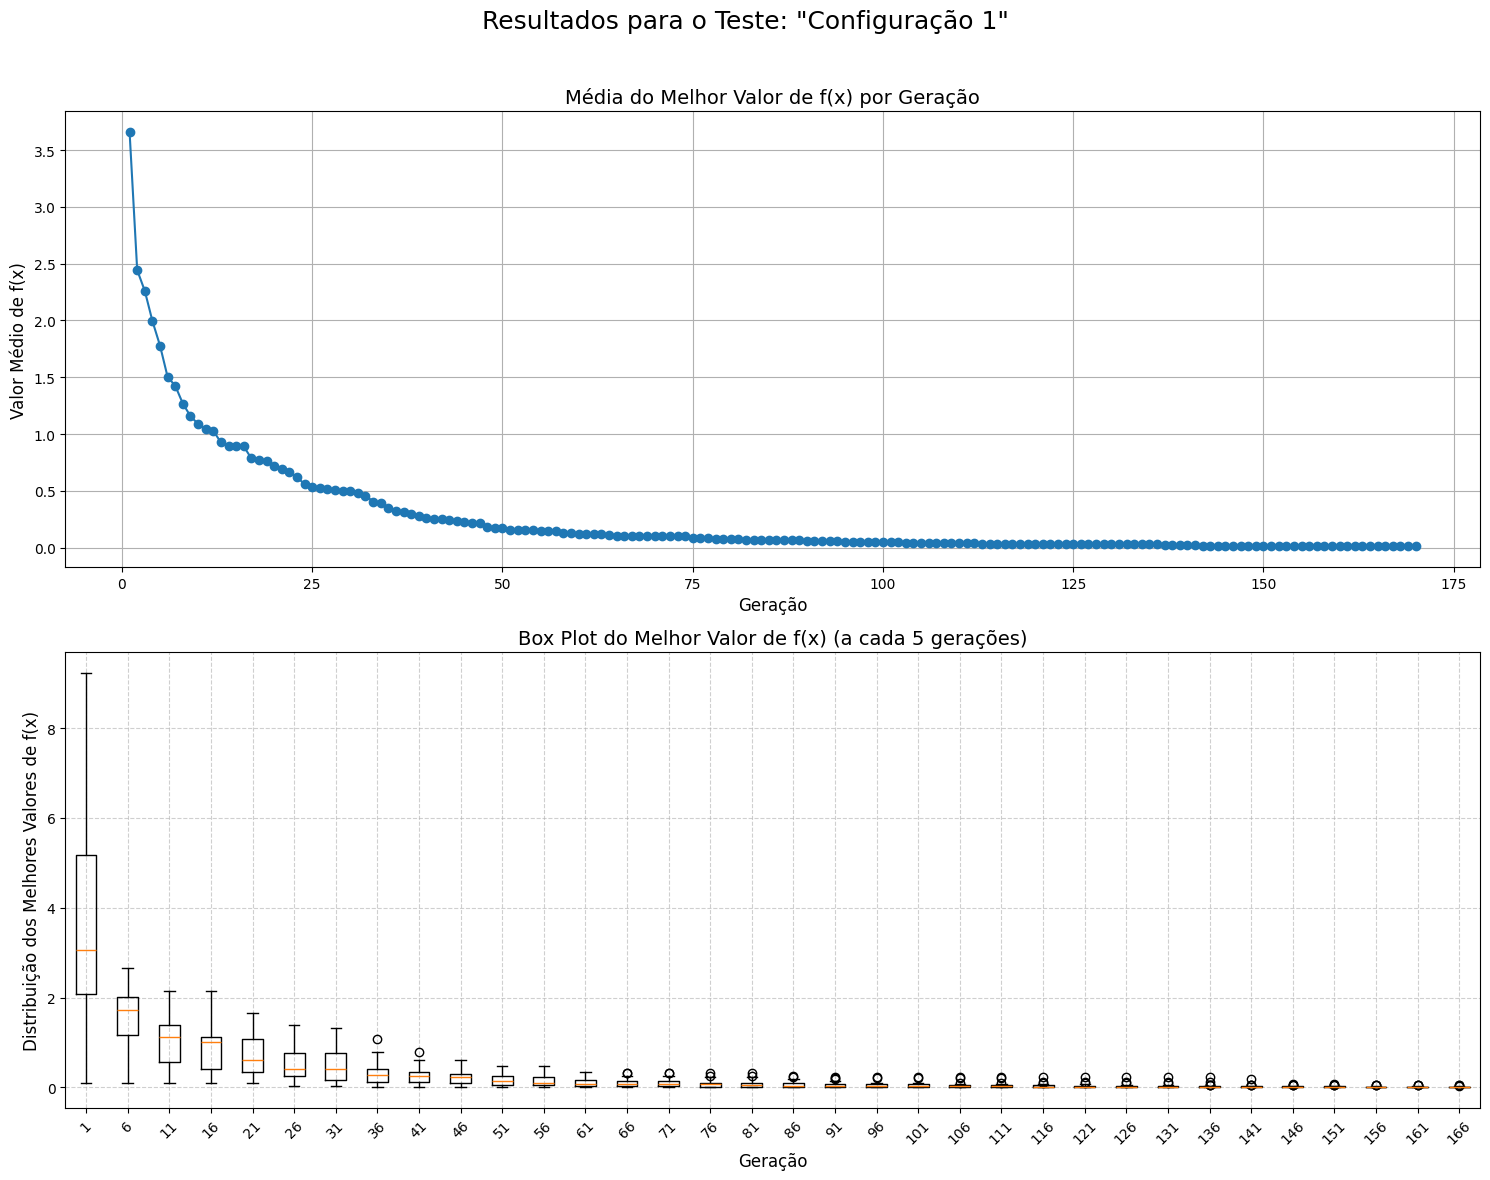

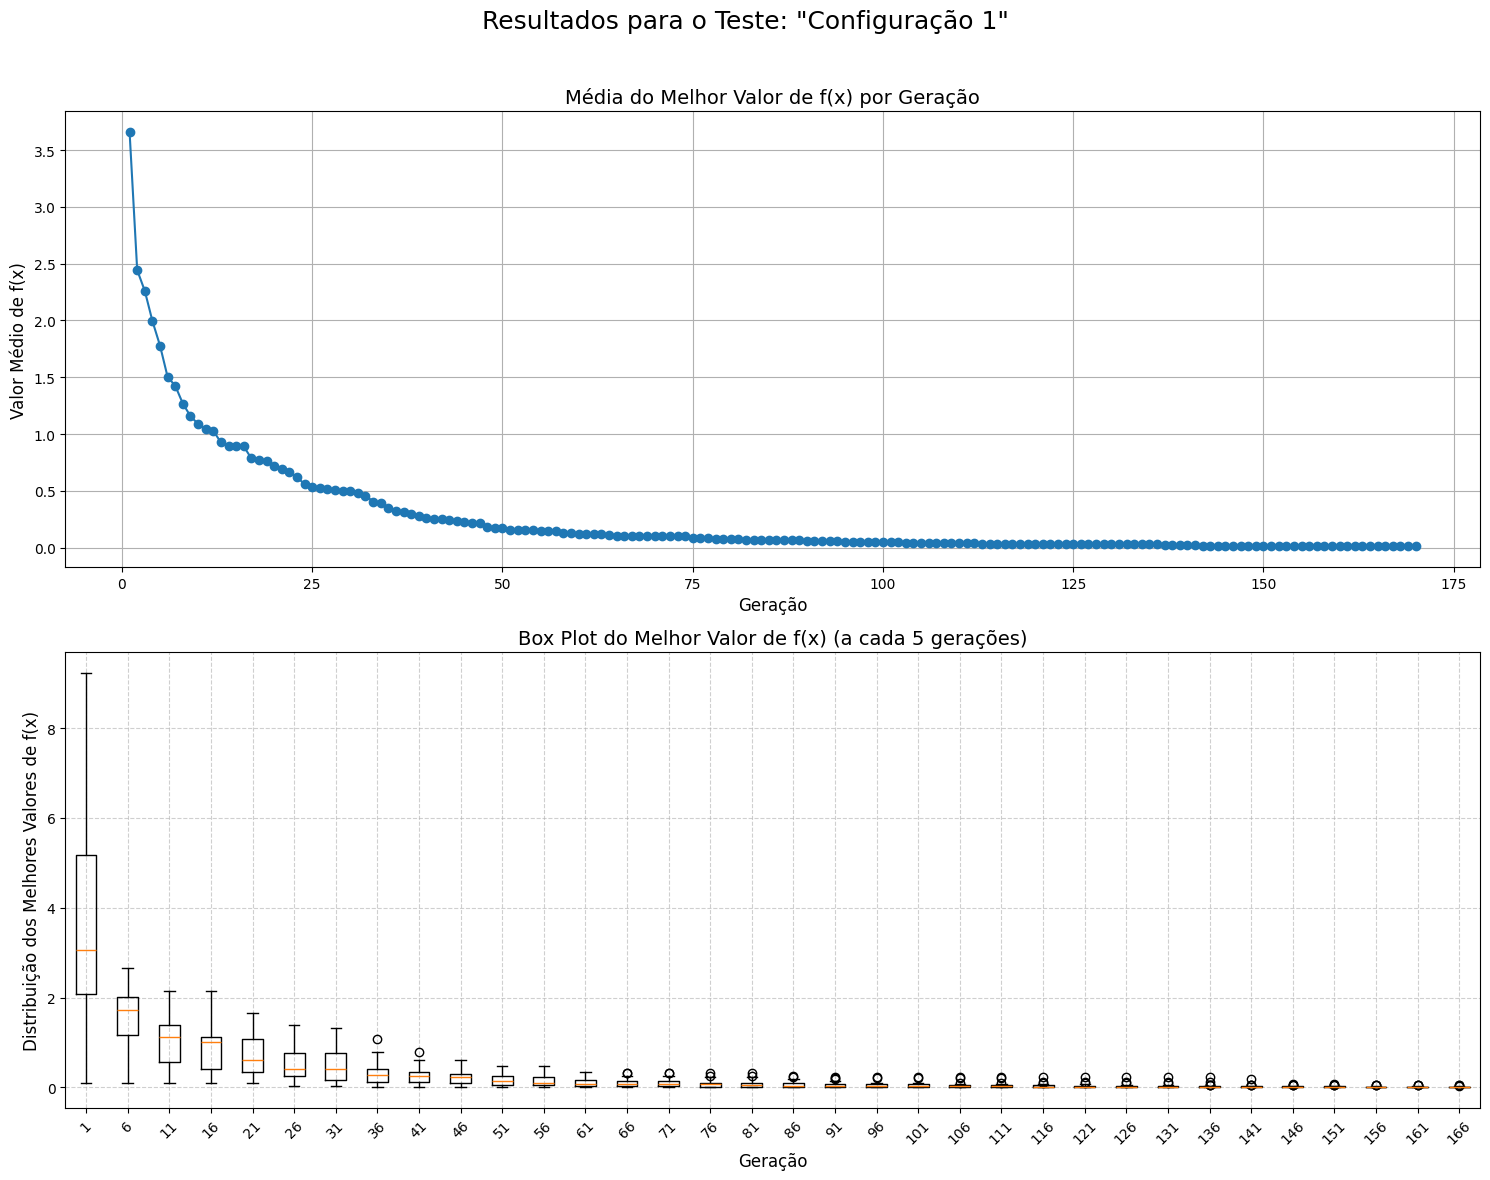

In [141]:

plotar_resultados_experimentos(tabela_resultados_cfg1, "Configuração 1")


#### Melhor indivíduo e média

In [142]:
obter_melhor_resultado_geral(tabela_resultados_cfg1)

{'score': 0.0005219361530777178, 'experimento': 'Experimento_23'}

In [143]:
calcular_media_resultados_finais(tabela_resultados_cfg1)

{'media': np.float64(0.012961966591675492),
 'desvio_padrao': 0.01335352589958469}

---
# Algoritmo genético - **configuração 2**

Foi alterado em relação à primeira configuração o modo de seleção para roulette obs: ele nao permite alterar a
normalização, a biblioteca já aplica uma normalização padrão que não tem como altera-la.


In [144]:
n_dimensao = 2
num_execucoes = 25

algorithm_param_cfg2 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.01,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'crossover_probability': 0.65,
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'roulette',
}





###Tabela de resultados

In [118]:
tabela_resultados_cfg2 = executar_experimentos(
    algorithm_param=algorithm_param_cfg2,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)


Iniciando bateria de 25 experimentos com dimensão n=2...


/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


In [171]:
tabela_resultados_cfg2

Experimento_1  Experimento_2  Experimento_3  Experimento_4  \
Geração                                                               
1             1.360720       5.520991       1.353213       8.687826   
2             1.360720       4.443971       1.353213       4.517497   
3             1.360720       2.448842       1.353213       4.517497   
4             1.360720       2.448842       1.353213       4.517497   
5             1.360720       2.448842       1.353213       4.517497   
...                ...            ...            ...            ...   
166           0.033043       0.055507       0.025481       0.002348   
167           0.033043       0.055507       0.025481       0.002348   
168           0.033043       0.055507       0.025481       0.002348   
169           0.033043       0.055507       0.025481       0.002348   
170           0.033043       0.055507       0.025481       0.002348   

         Experimento_5  Experimento_6  Experimento_7  Experimento_8  \
Geração                                                               
1             4.993570       5.318055       2.038423       3.582230   
2             0.155359       5.318055       2.038423       1.517652   
3             0.155359       1.728192       2.038423       1.293604   
4             0.155359       1.728192       2.038423       1.293604   
5             0.155359       1.728192       2.038423       1.293604   
...                ...            ...            ...            ...   
166           0.013694       0.005803       0.008052       0.008679   
167           0.013694       0.005803       0.008052       0.008679   
168           0.013694       0.005803       0.008052       0.008679   
169           0.013694       0.005803       0.008052       0.008679   
170           0.013694       0.005803       0.008052       0.008679   

         Experimento_9  Experimento_10  ...  Experimento_16  Experimento_17  \
Geração                                 ...                                   
1             0.202875        6.306585  ...        1.464282        2.560405   
2             0.202875        5.606956  ...        1.464282        1.501652   
3             0.202875        3.757381  ...        1.464282        1.501652   
4             0.202875        3.757381  ...        1.206066        1.501652   
5             0.202875        3.757381  ...        1.206066        1.501652   
...                ...             ...  ...             ...             ...   
166           0.037164        0.005847  ...        0.034305        0.019355   
167           0.037164        0.005847  ...        0.034305        0.019355   
168           0.037164        0.005847  ...        0.034305        0.019355   
169           0.037164        0.005847  ...        0.034305        0.019355   
170           0.037164        0.005847  ...        0.034305        0.019355   

         Experimento_18  Experimento_19  Experimento_20  Experimento_21  \
Geração                                                                   
1              2.232294        4.176116        4.487161        4.352938   
2              2.232294        4.176116        2.568140        4.352938   
3              2.232294        4.176116        2.568140        4.352938   
4              2.232294        2.432790        2.034031        4.352938   
5              2.232294        2.362175        2.034031        2.062409   
...                 ...             ...             ...             ...   
166            0.001519        0.049505        0.072651        0.084870   
167            0.001519        0.049505        0.072651        0.084870   
168            0.001519        0.049505        0.072651        0.084870   
169            0.001519        0.049505        0.072651        0.084870   
170            0.001519        0.049505        0.072651        0.084870   

         Experimento_22  Experimento_23  Experimento_24  Experimento_25  
Geração                                                                  
1        

### Gráficos do resultado do GA com roleta (configuração 2)

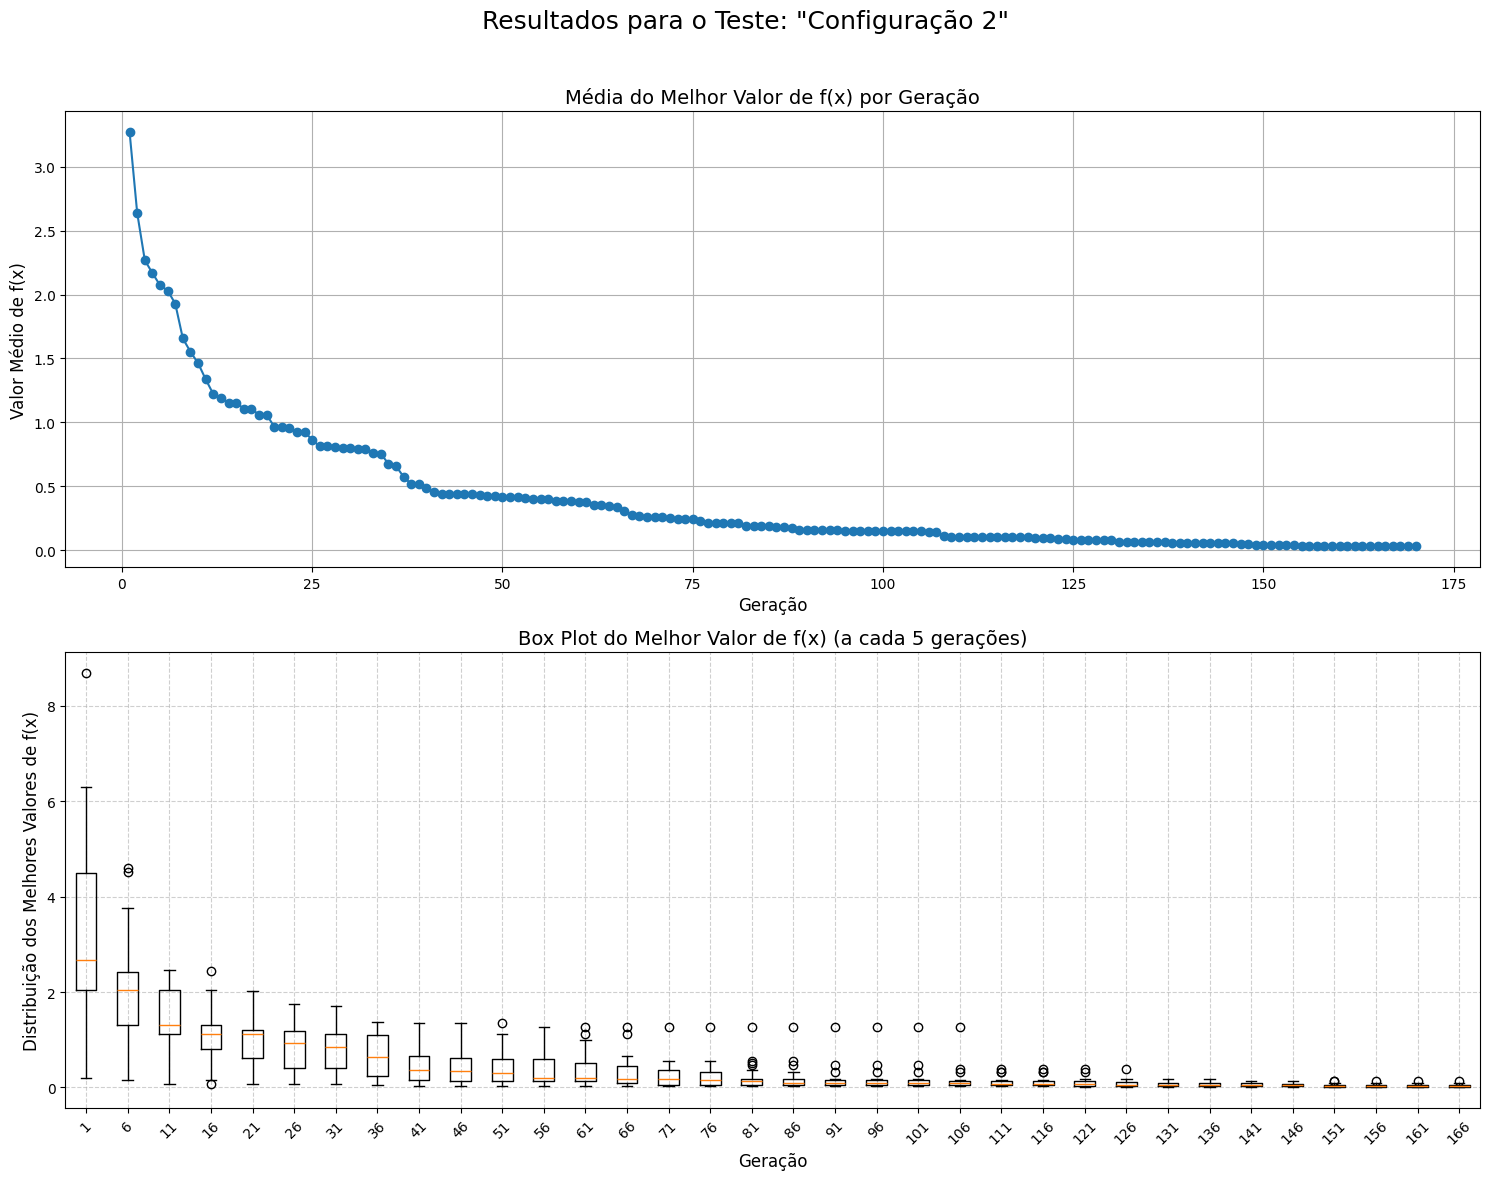

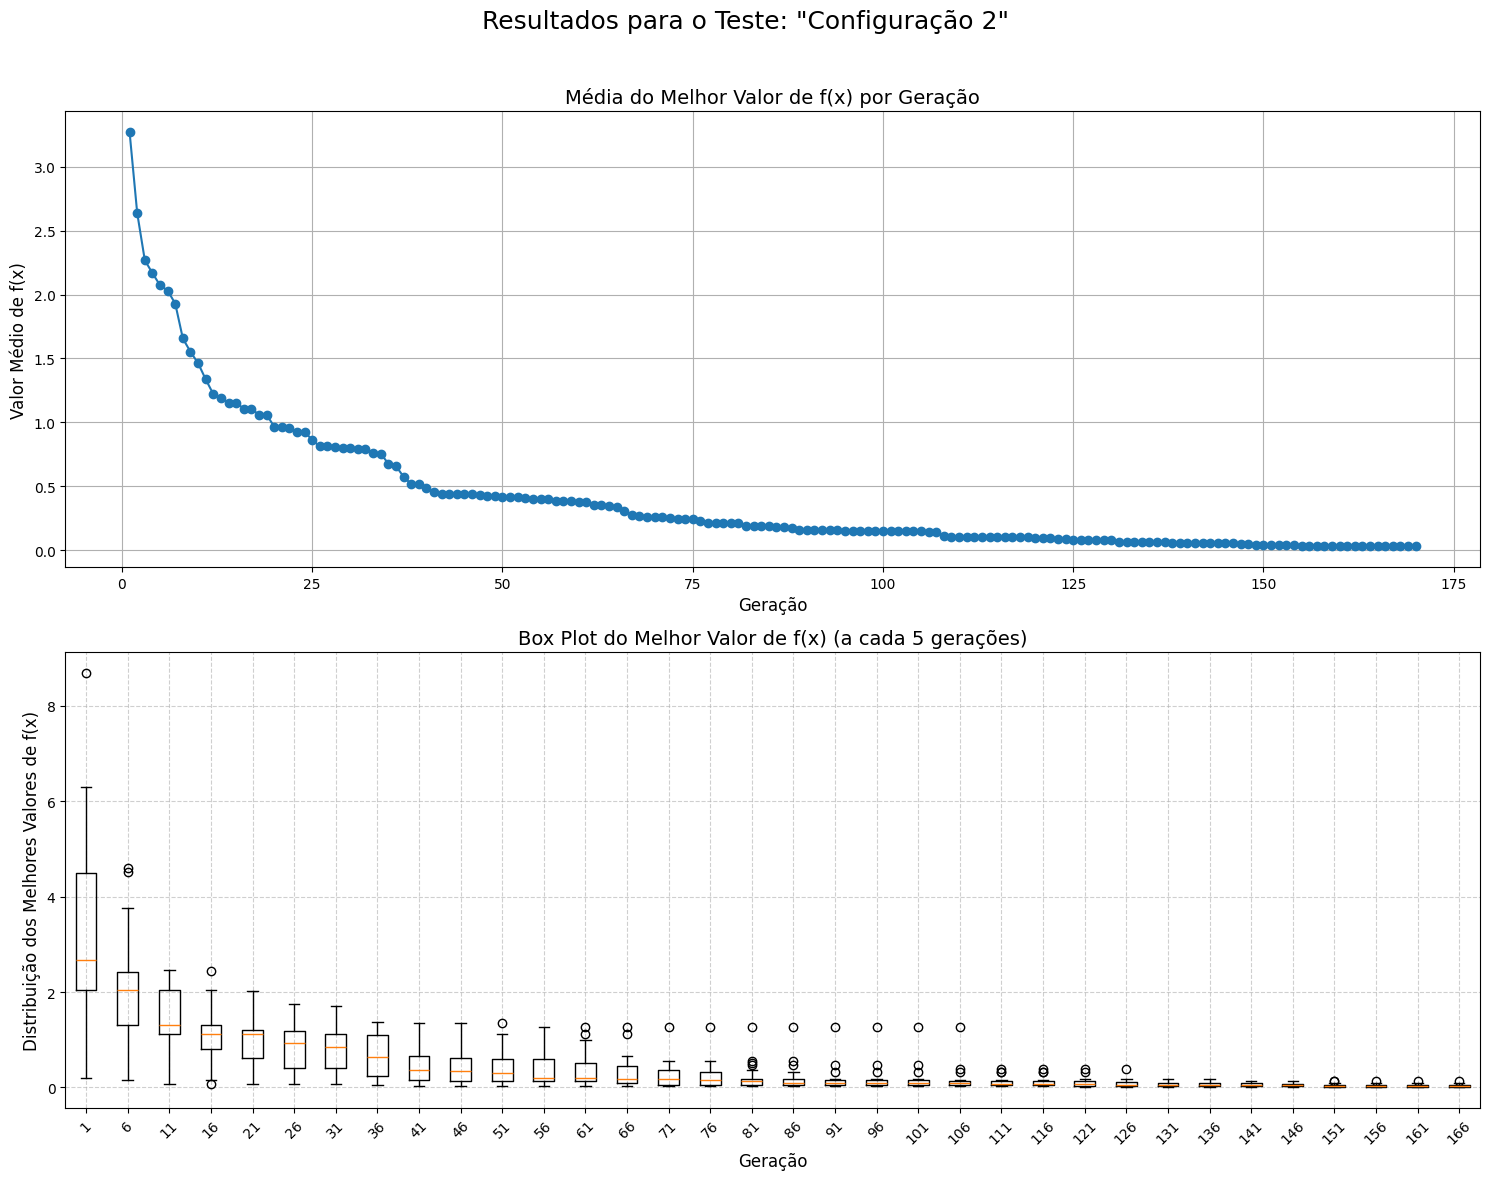

In [146]:
plotar_resultados_experimentos(tabela_resultados_cfg2, "Configuração 2")

### Gráficos comparando a Configuração 1 (torneio) com a Configuração 2 (roleta).

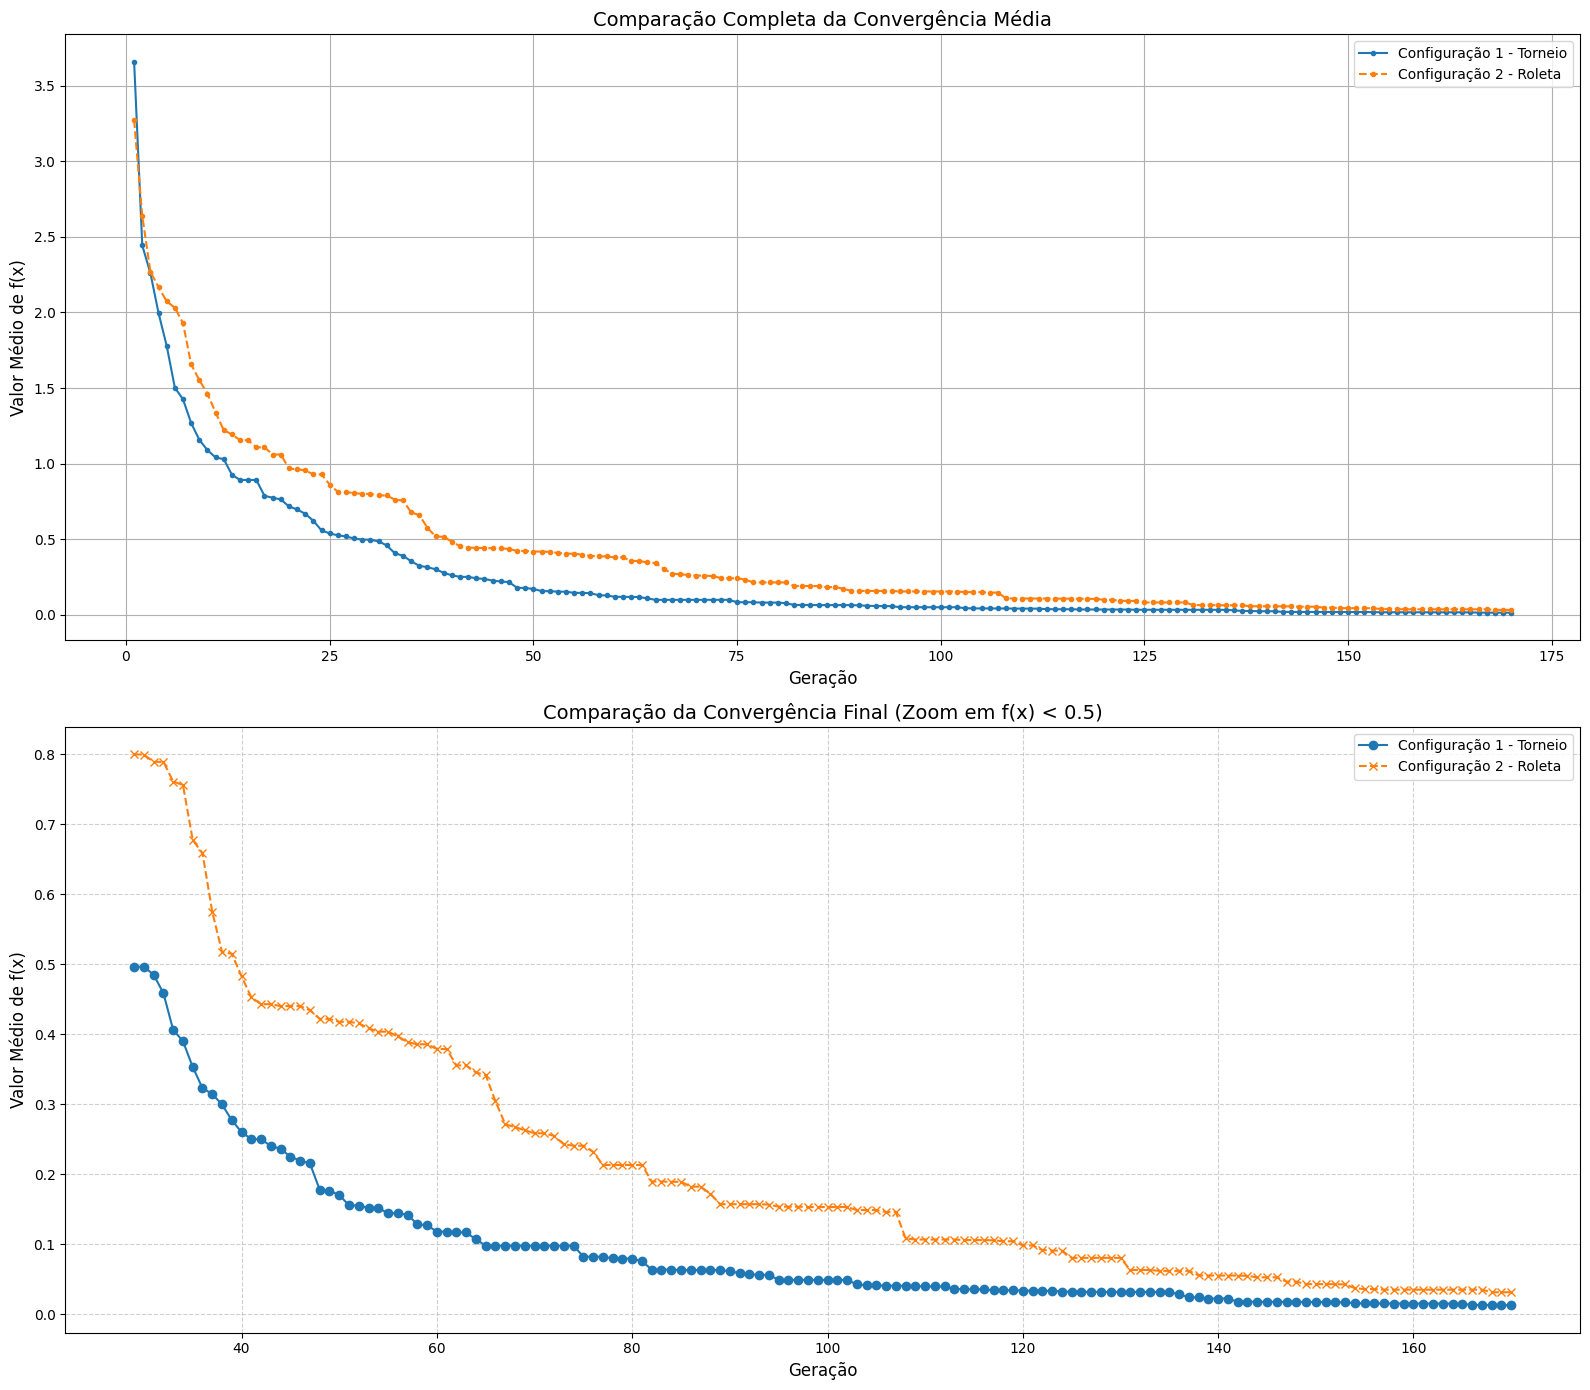

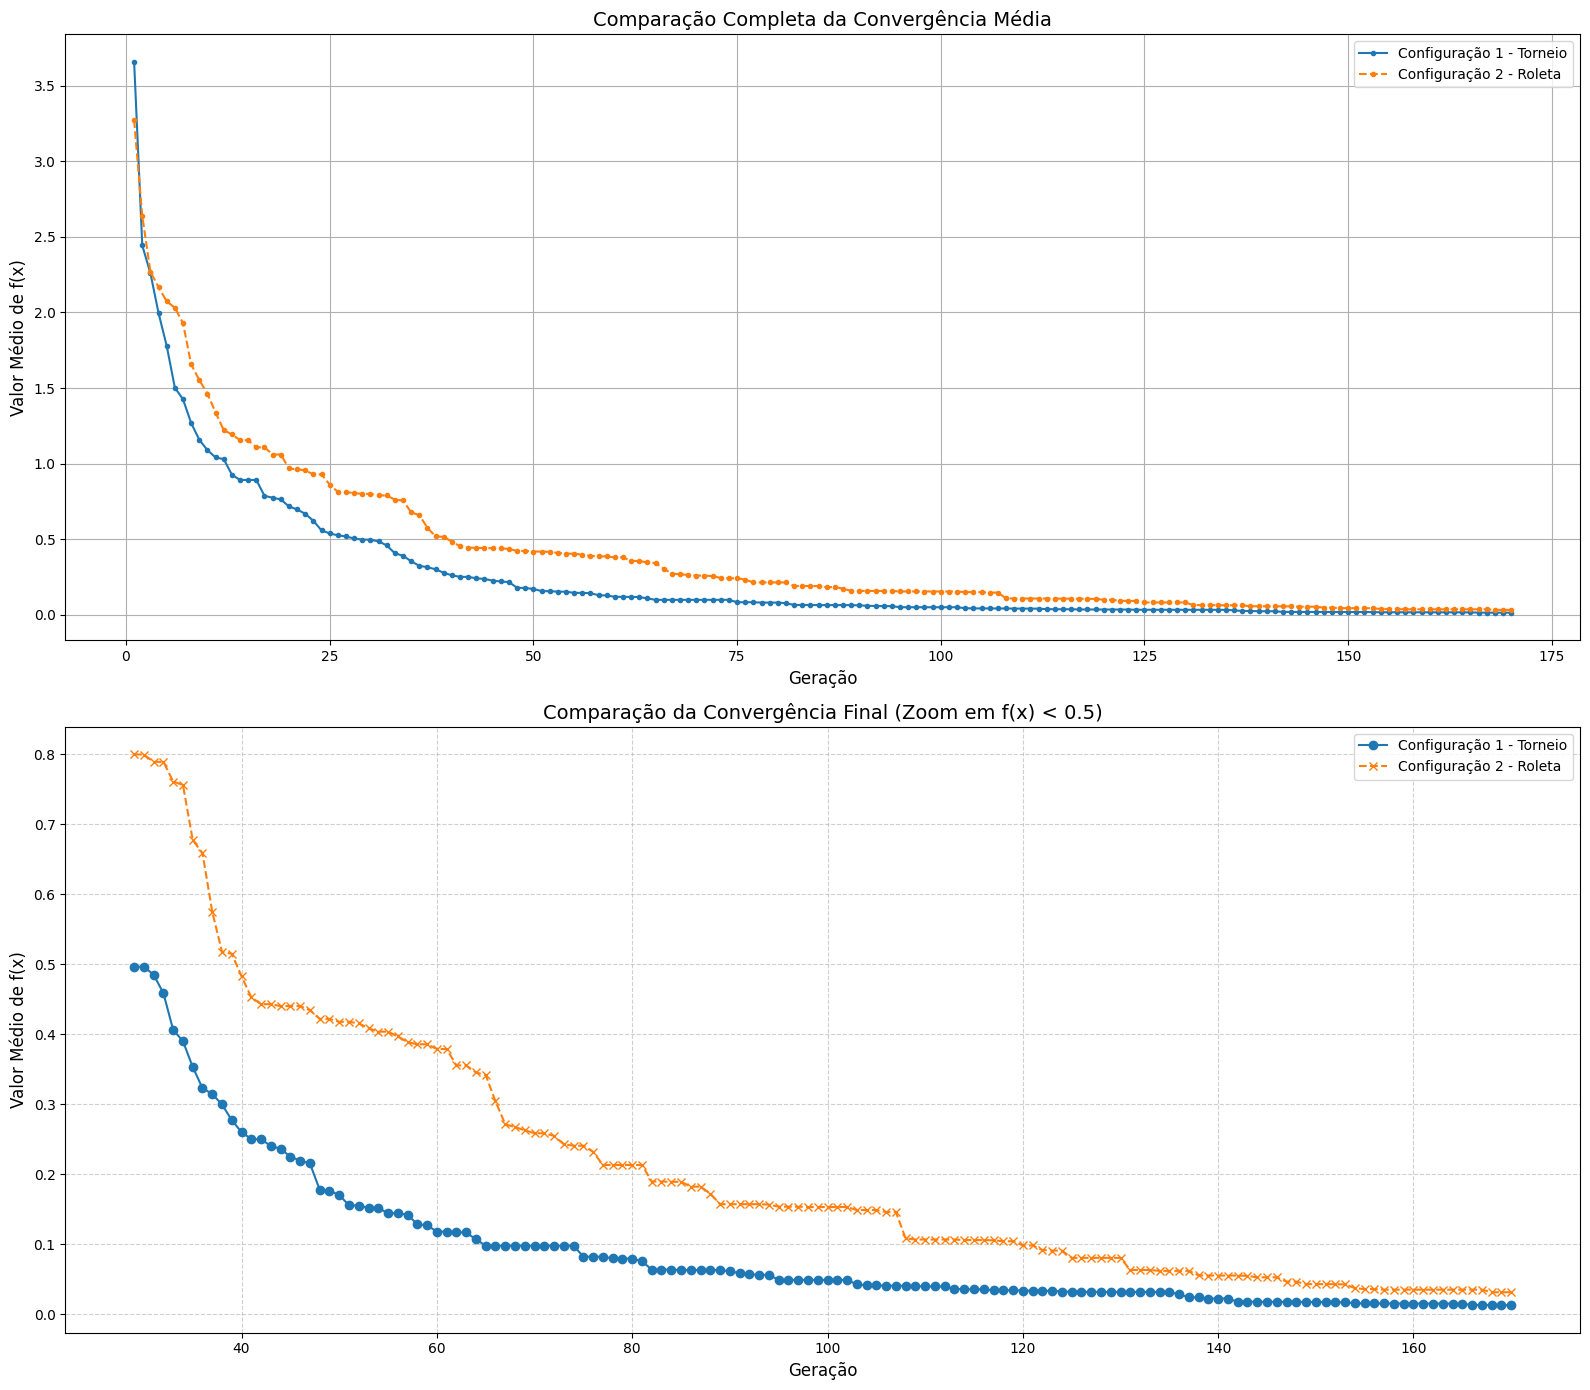

In [147]:
plotar_comparacao_configuracoes(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg2,
    label_config1='Configuração 1 - Torneio',
    label_config2='Configuração 2 - Roleta'
)

Comparando a segunda configuração com a primeira através do gráfico acima vemos que os hiperparâmetros com torneio convergem mais rapidamente e tem valor mais baixo.


Reorganizando dados para o boxplot comparativo...
Gerando o gráfico de Box Plot comparativo...


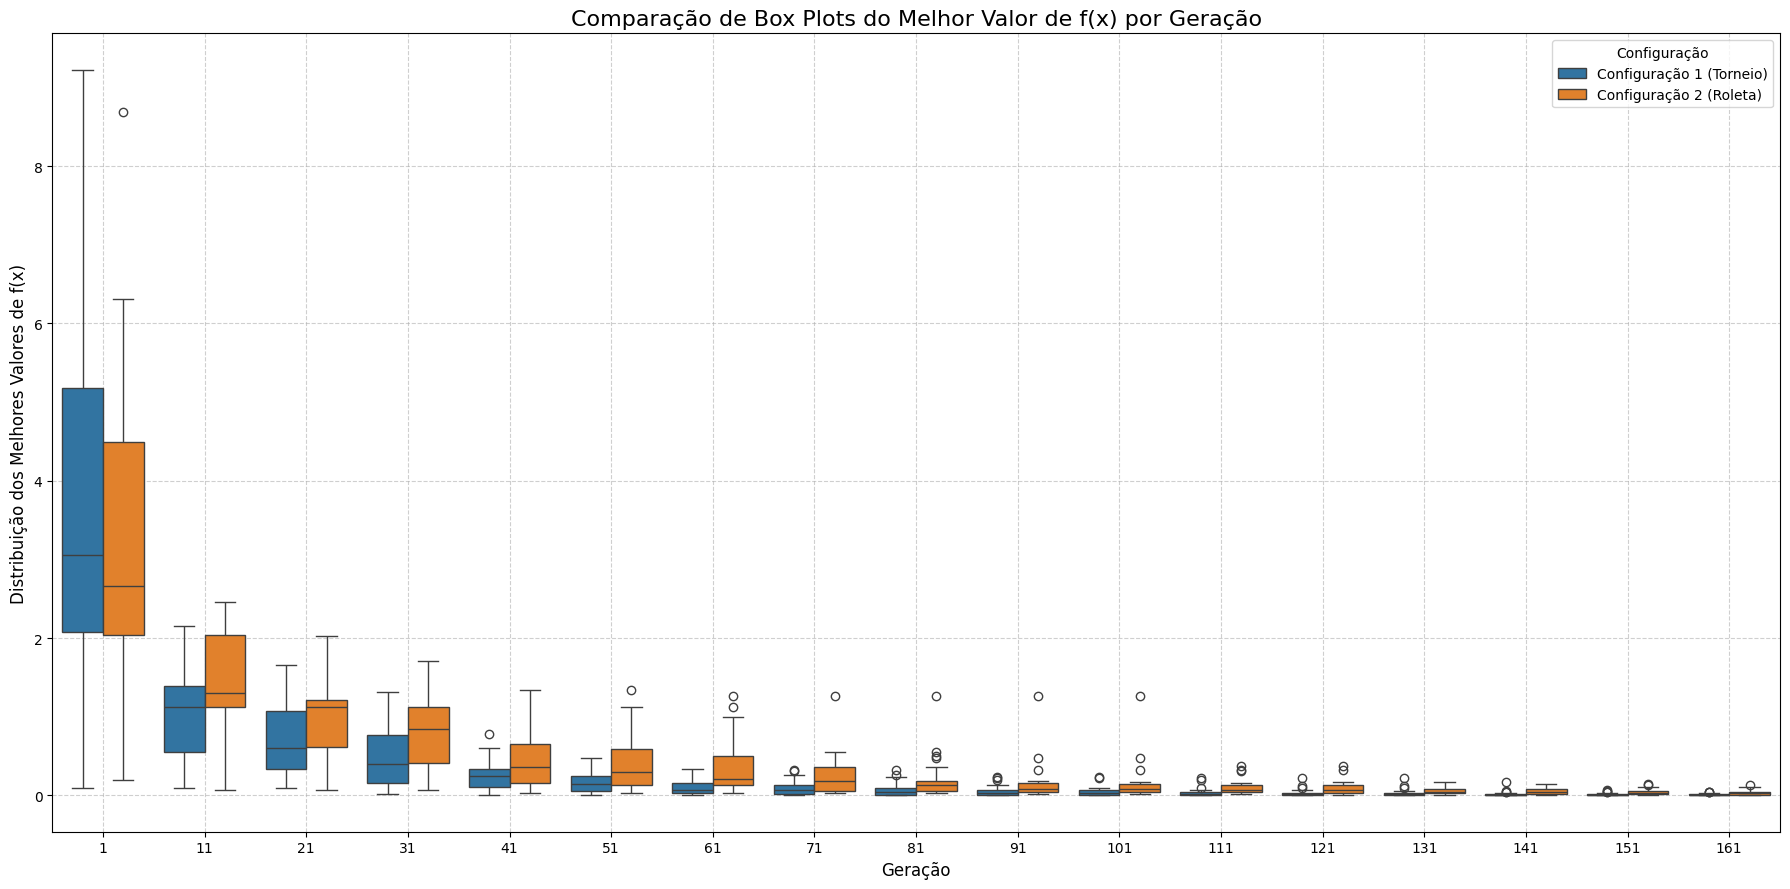

Reorganizando dados para o boxplot comparativo...
Gerando o gráfico de Box Plot comparativo...


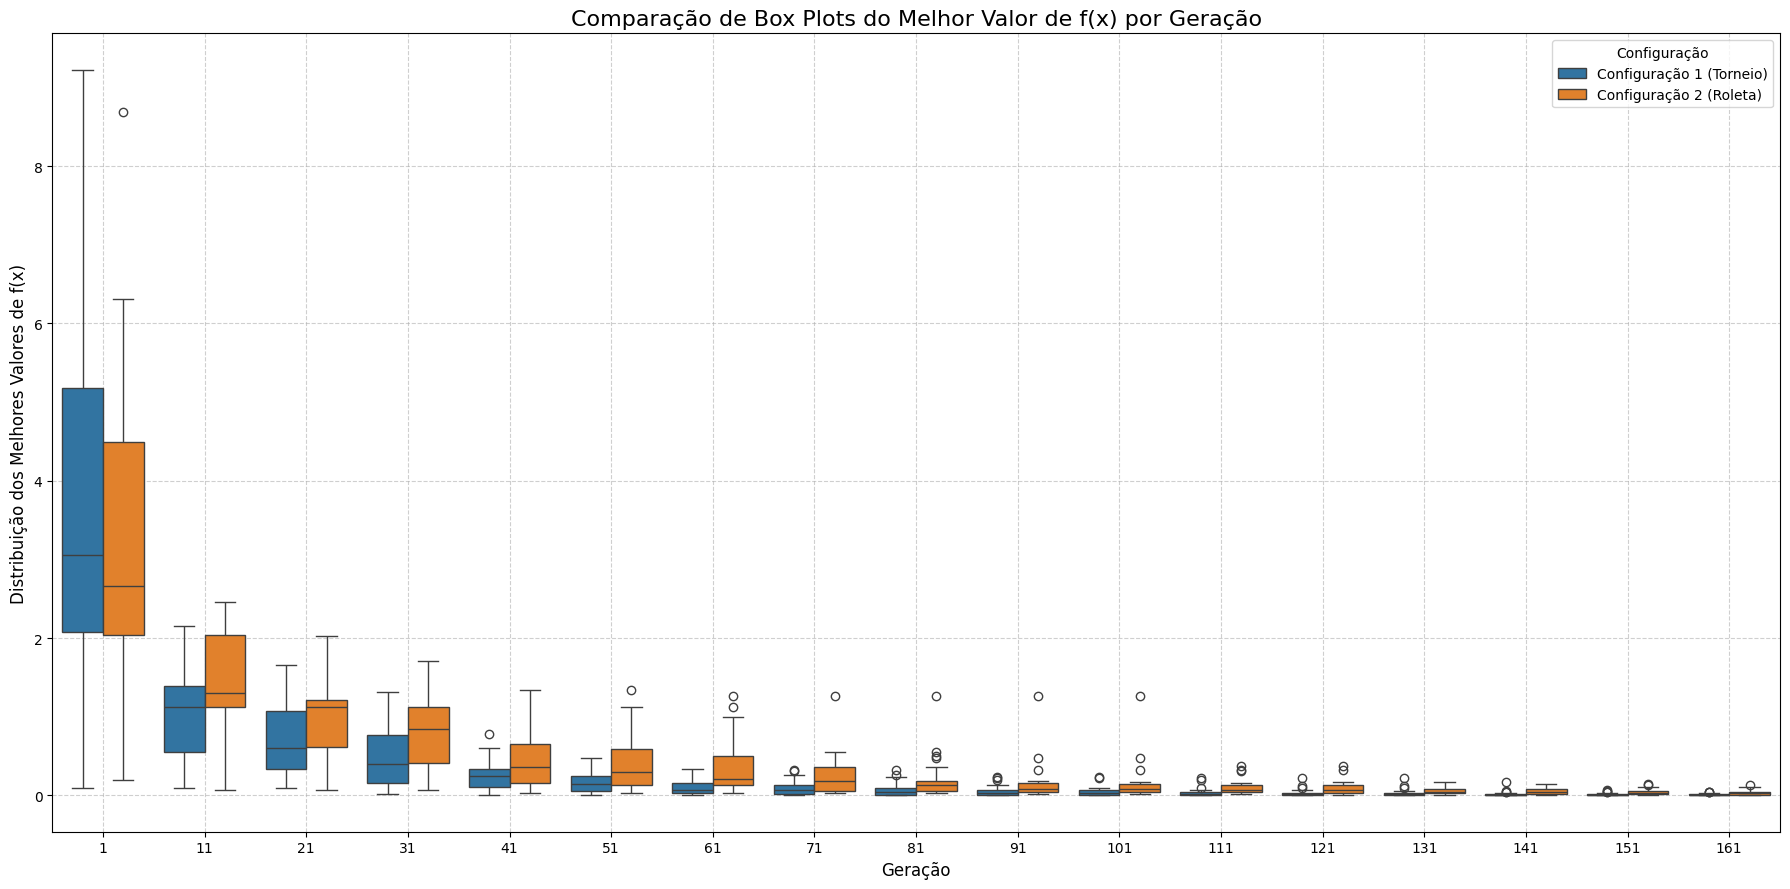

In [148]:
plotar_boxplot_comparativo(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg2,
    label_config1='Configuração 1 (Torneio)',
    label_config2='Configuração 2 (Roleta)'
)


No torneio, as caixas tornam-se muito curtas e achatadas mais rapidamente. Isto significa que a grande maioria das 20 execuções encontrou resultados muito similares e muito bons. O algoritmo é consistente e confiável.

Na roleta, as caixas são mais "altas" por mais tempo. Na indicando uma grande dispersão nos resultados. Alguns experimentos podem ter encontrado uma boa solução, mas outros ainda estavam com scores muito piores. O algoritmo é menos consistente e o resultado é menos previsível.


####Melhor indivíduo, média e desvio padrão

##### Roleta

In [172]:
obter_melhor_resultado_geral(tabela_resultados_cfg2)

{'score': 0.0015190781769405248, 'experimento': 'Experimento_18'}

In [173]:
calcular_media_resultados_finais(tabela_resultados_cfg2)

{'media': np.float64(0.03140411831567633),
 'desvio_padrao': 0.032145418490534386}

##### Torneio

In [174]:
obter_melhor_resultado_geral(tabela_resultados_cfg1)

{'score': 0.0005219361530777178, 'experimento': 'Experimento_23'}

In [175]:
calcular_media_resultados_finais(tabela_resultados_cfg1)

{'media': np.float64(0.012961966591675492),
 'desvio_padrao': 0.01335352589958469}

#####Em média por experimentos a primeira é ligeramente melhor, além de ser mais consistente possuindo um menor desvio padrão.

###Conclusão sobre qual configuração seguir

Devido à primeira solução com torneio se estabilizar consideravelmente mais rápido e em média ser melhor, seguiremos utilizando ela como efeito de comparação e potencial escolha.

---
# Algoritmo genético - **configuração 3**
Foi alterado em relação à primeira configuração a taxa de mutação de 1 % para 8%

In [153]:
n_dimensao = 2
num_execucoes = 25

algorithm_param_cfg3 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.08, #ALTERAÇÃO
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'crossover_probability': 0.65,
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament', #Seguiremos com torneio - foi melhor em relacao a roleta
}

###Tabela de resultados

In [154]:
tabela_resultados_cfg3 = executar_experimentos(
    algorithm_param=algorithm_param_cfg3,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)


Iniciando bateria de 25 experimentos com dimensão n=2...


/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


Iniciando bateria de 25 experimentos com dimensão n=2...


/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


In [176]:
tabela_resultados_cfg3

Experimento_1  Experimento_2  Experimento_3  Experimento_4  \
Geração                                                               
1             1.227773       2.203463       3.998531       2.549433   
2             1.227773       2.203463       3.998531       2.065130   
3             1.227773       2.203463       3.998531       2.065130   
4             1.227773       2.203463       3.998531       2.065130   
5             1.227773       2.203463       3.643794       2.065130   
...                ...            ...            ...            ...   
166           0.024653       0.000190       0.007701       0.008519   
167           0.024653       0.000190       0.007701       0.008519   
168           0.024653       0.000190       0.007701       0.008519   
169           0.024653       0.000190       0.007701       0.008519   
170           0.024653       0.000190       0.007701       0.008519   

         Experimento_5  Experimento_6  Experimento_7  Experimento_8  \
Geração                                                               
1             1.949704       2.934612       1.925812       2.069307   
2             1.949704       2.934612       1.925812       2.069307   
3             0.997630       2.934612       1.925812       2.069307   
4             0.997630       2.934612       0.177659       2.069307   
5             0.997630       2.934612       0.177659       2.069307   
...                ...            ...            ...            ...   
166           0.081011       0.011418       0.013098       0.020805   
167           0.081011       0.011418       0.013098       0.020805   
168           0.081011       0.011418       0.013098       0.020805   
169           0.081011       0.011418       0.013098       0.020805   
170           0.081011       0.011418       0.013098       0.020805   

         Experimento_9  Experimento_10  ...  Experimento_16  Experimento_17  \
Geração                                 ...                                   
1             0.059666        6.008028  ...        1.679633        2.494779   
2             0.059666        4.097248  ...        1.679633        2.494779   
3             0.059666        3.643503  ...        1.679633        2.494779   
4             0.059666        1.013133  ...        1.679633        2.494779   
5             0.059666        1.013133  ...        0.211291        2.494779   
...                ...             ...  ...             ...             ...   
166           0.008467        0.001745  ...        0.020540        0.012516   
167           0.008467        0.001745  ...        0.020540        0.012516   
168           0.008467        0.001745  ...        0.020540        0.012516   
169           0.008467        0.001745  ...        0.020540        0.012516   
170           0.008467        0.001745  ...        0.020540        0.012516   

         Experimento_18  Experimento_19  Experimento_20  Experimento_21  \
Geração                                                                   
1              4.003861        0.195177        1.608165        5.896142   
2              4.003861        0.195177        1.608165        1.754359   
3              0.728359        0.195177        1.608165        1.754359   
4              0.728359        0.195177        1.608165        1.585576   
5              0.728359        0.195177        1.608165        1.585576   
...                 ...             ...             ...             ...   
166            0.005546        0.074174        0.002776        0.002003   
167            0.005546        0.074174        0.002776        0.002003   
168            0.005546        0.074174        0.002776        0.002003   
169            0.005546        0.074174        0.002776        0.002003   
170            0.005546        0.074174        0.002776        0.002003   

         Experimento_22  Experimento_23  Experimento_24  Experimento_25  
Geração                                                                  
1        

### Gráficos do resultado do GA com 8% de mutação

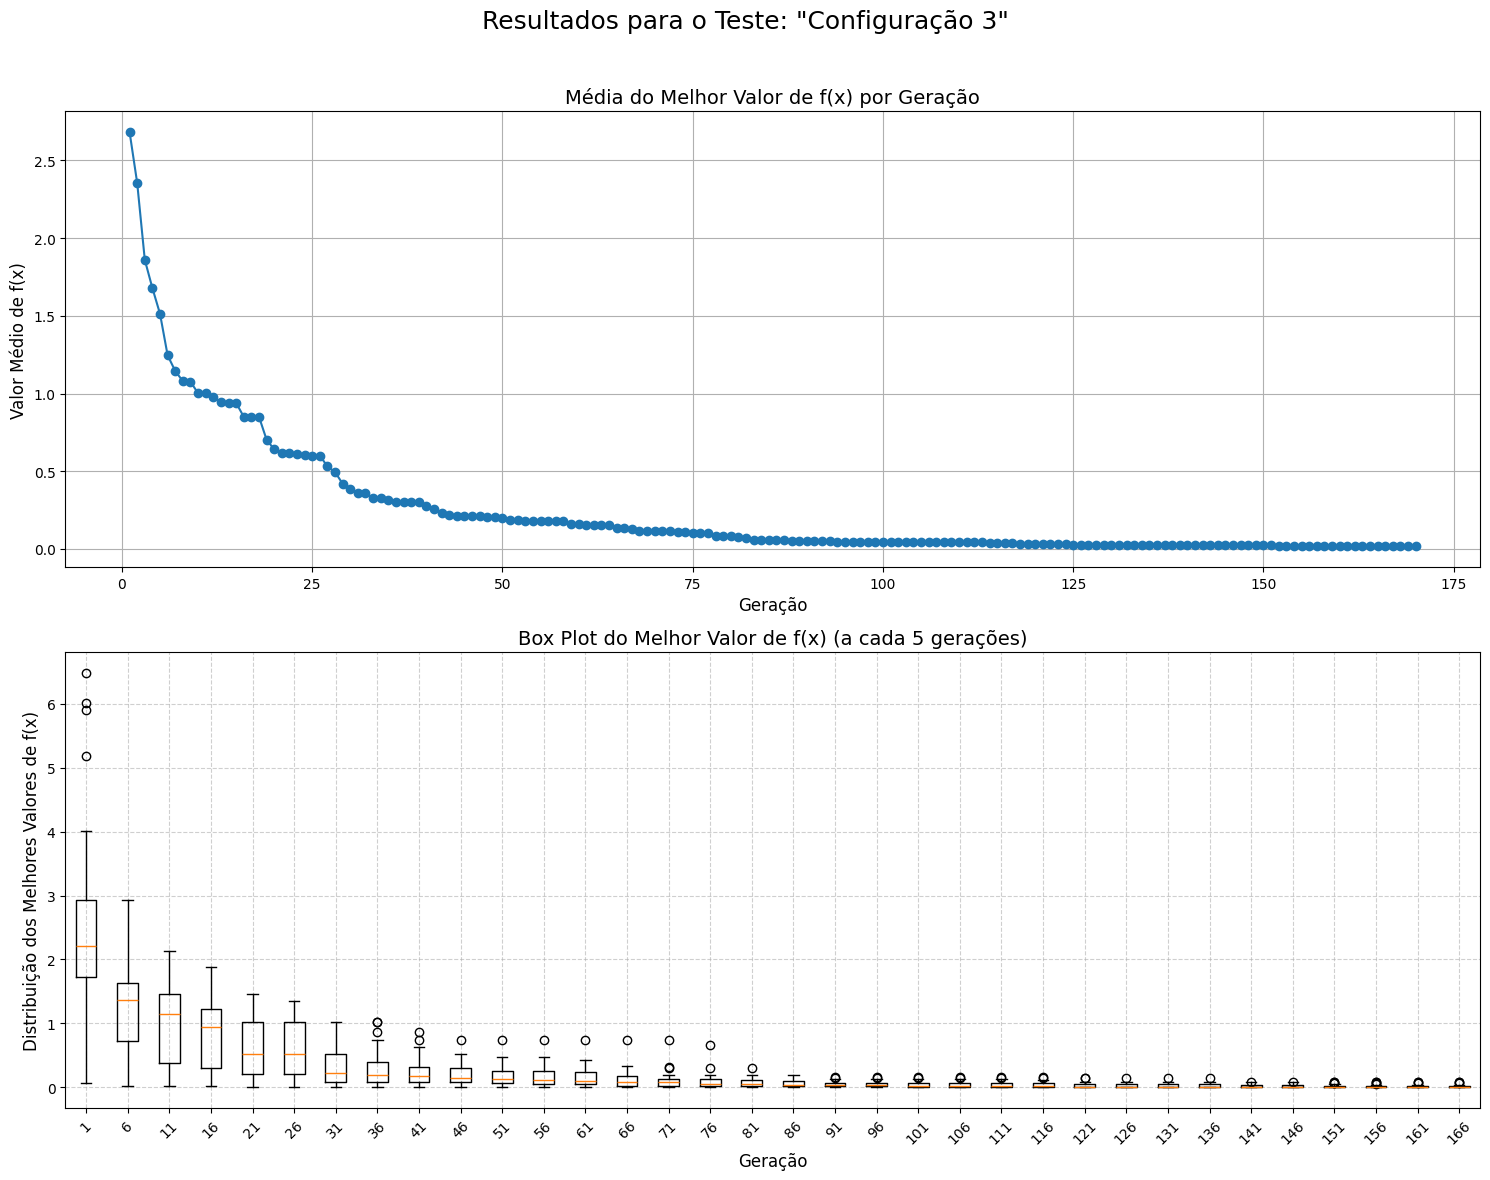

In [184]:
plotar_resultados_experimentos(tabela_resultados_cfg3, "Configuração 3")

### Gráficos comparando a Configuração 1 (1% de mutação) com a Configuração 3 (8% de mutação).

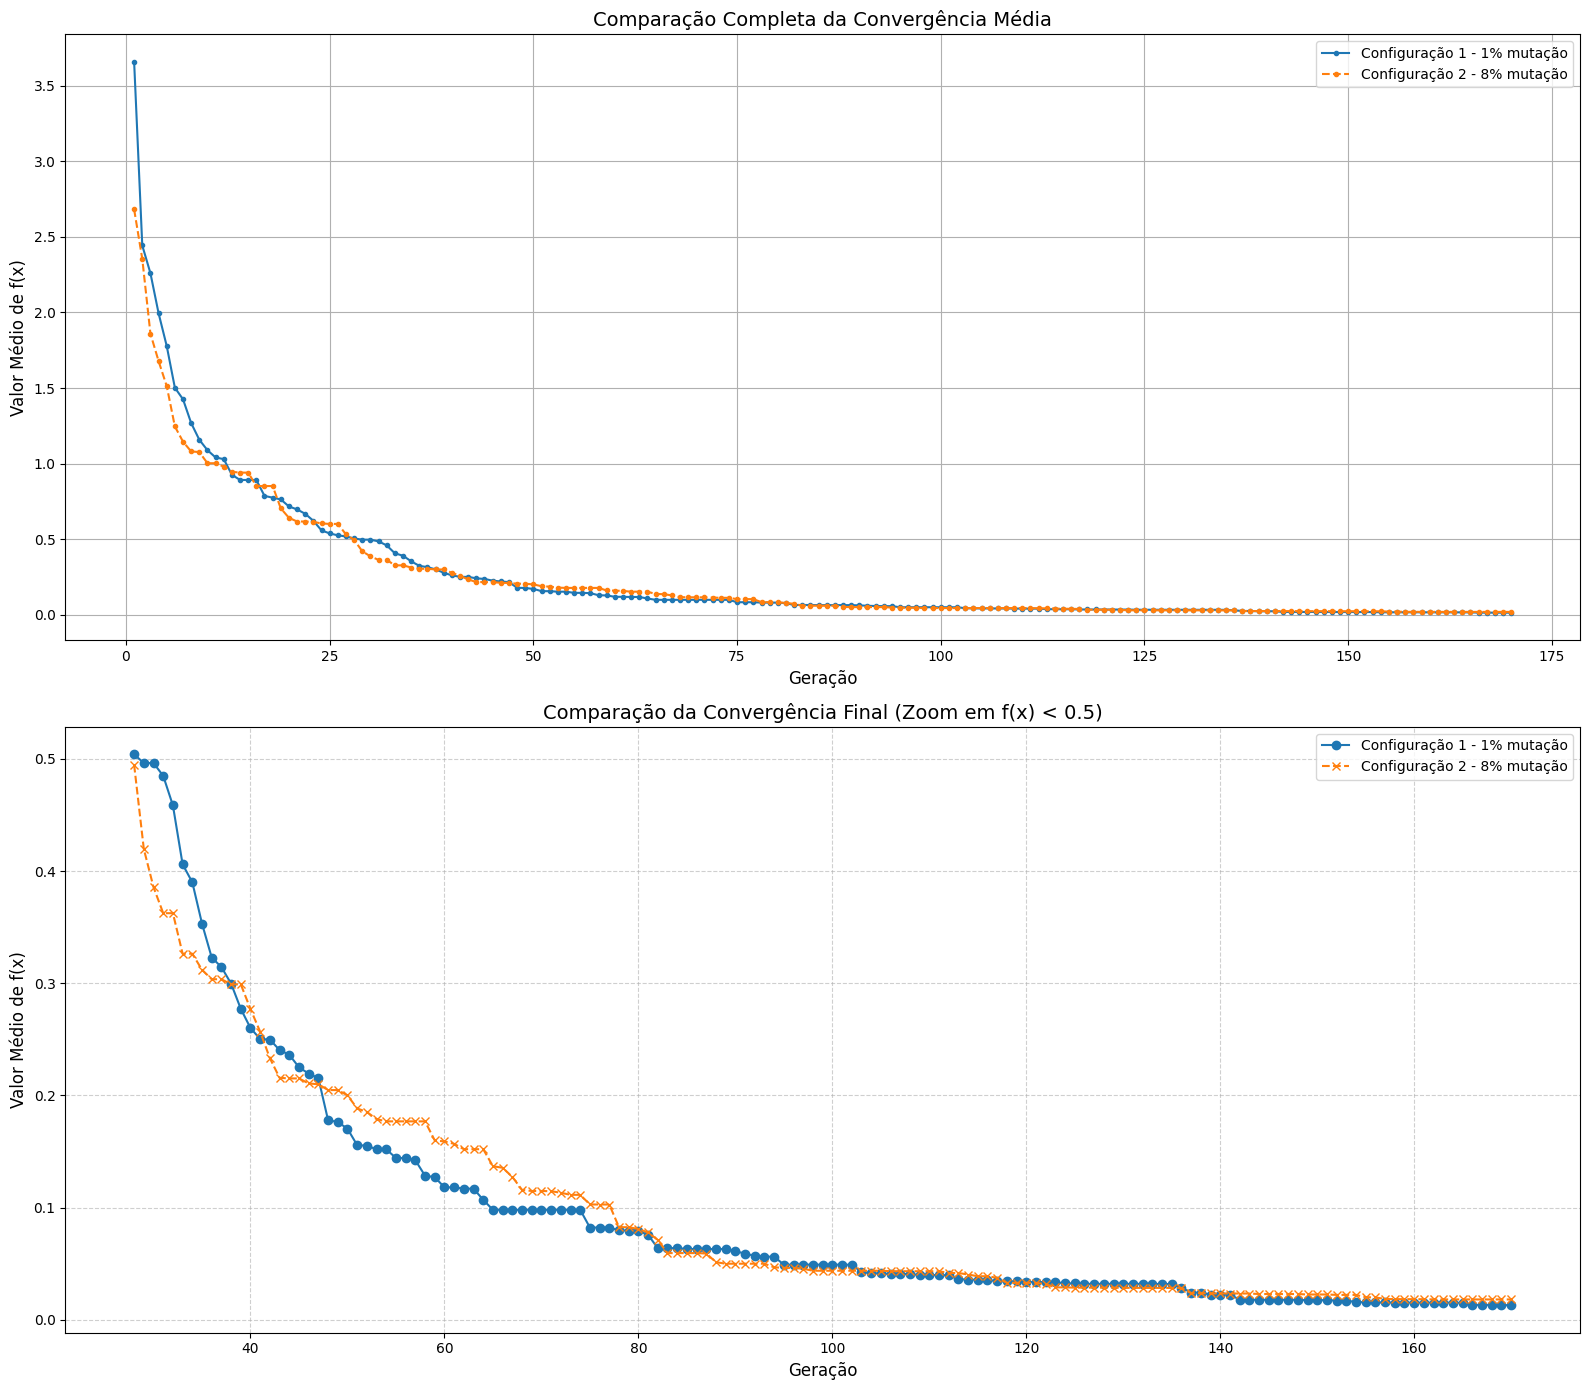

In [178]:
plotar_comparacao_configuracoes(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg3,
    label_config1='Configuração 1 - 1% mutação',
    label_config2='Configuração 2 - 8% mutação'
)

Percebe-se que alterna entre melhor, uma hora é 1% outra é 8%, porém no final, nas 30 últimas gerações a mutação 1% foi melhor.

Reorganizando dados para o boxplot comparativo...
Gerando o gráfico de Box Plot comparativo...


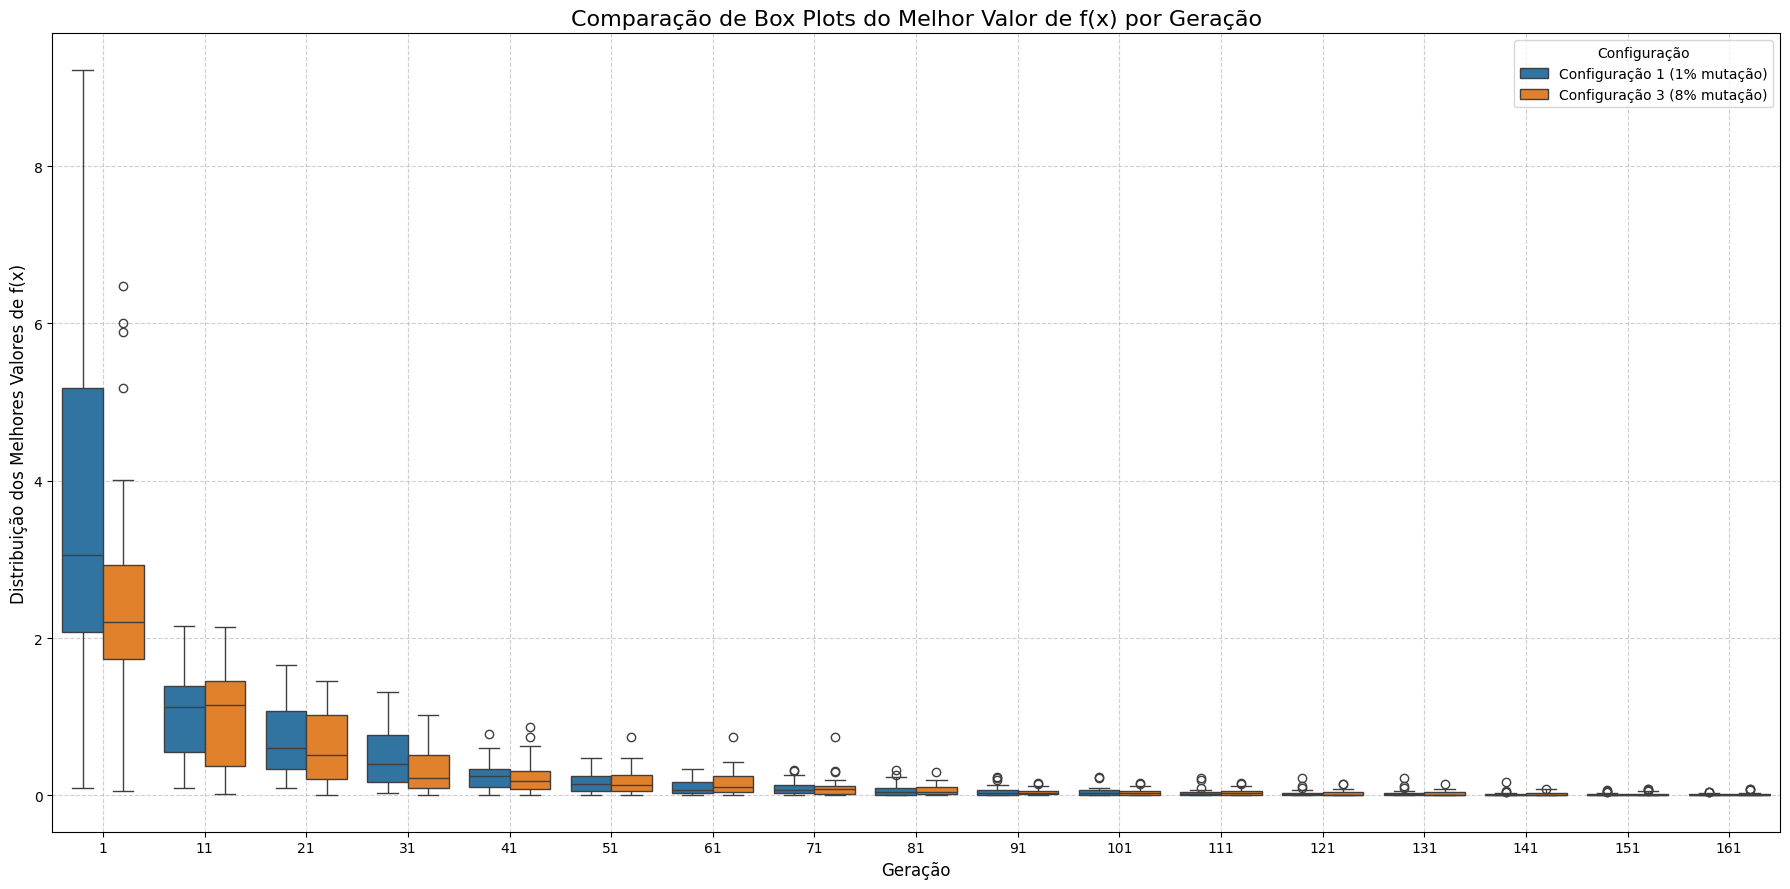

In [179]:
plotar_boxplot_comparativo(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg3,
    label_config1='Configuração 1 (1% mutação)',
    label_config2='Configuração 3 (8% mutação)'
)


O boxplot mostra que ambos os valores são bem proximos até mesmo em média e desvio, em um momento a mutação de 1% é melhor em outro a mutação de 8% é melhor. Isso mostra que é difícil decidir entre os 2 levando em consideração o boxplot.

####Melhor indivíduo, média e desvio padrão

##### 8% mutação

In [180]:
obter_melhor_resultado_geral(tabela_resultados_cfg3)

{'score': 0.00018983618171120042, 'experimento': 'Experimento_2'}

In [181]:
calcular_media_resultados_finais(tabela_resultados_cfg3)

{'media': np.float64(0.018076392663780895),
 'desvio_padrao': 0.023786275614198066}

##### 1% mutação

In [182]:
obter_melhor_resultado_geral(tabela_resultados_cfg1)

{'score': 0.0005219361530777178, 'experimento': 'Experimento_23'}

In [183]:
calcular_media_resultados_finais(tabela_resultados_cfg1)

{'media': np.float64(0.012961966591675492),
 'desvio_padrao': 0.01335352589958469}

#####A taxa de mutação de 1% demonstrou um valor médio melhor e um desvio padrão menor também.

### Conclusão

A escolha entre a mutação de 8% e de 1% não irá afetar tanto quando a escolha entre roleta e torneio, ambas são bem parecidas, um valor de mutação menor ou igual a 1% é o mais padrão, além disso 1% teve um valor em média um pouco melhor, além de estabilizar no final em um valor melhor, então a escolha será o algoritmo de 1%.

---
# Algoritmo genético - **configuração 4**
Foi alterado em relação à primeira configuração a taxa de crossover de 65% para 75%.

Foi aumentado taxa de crossover de 65% para 75%

In [185]:
n_dimensao = 2
num_execucoes = 25

algorithm_param_cfg4 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.08,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'crossover_probability': 0.75,
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
}


### Tabela de resultados

In [186]:
tabela_resultados_cfg4 = executar_experimentos(
    algorithm_param=algorithm_param_cfg4,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)

Iniciando bateria de 25 experimentos com dimensão n=2...


/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


In [187]:
tabela_resultados_cfg4

Experimento_1  Experimento_2  Experimento_3  Experimento_4  \
Geração                                                               
1             1.519500       5.625078       4.047330       4.880456   
2             1.519500       5.625078       2.127444       4.880456   
3             1.519500       5.625078       2.127444       2.172334   
4             1.519500       2.062786       2.127444       2.172334   
5             1.519500       2.062786       2.127444       2.172334   
...                ...            ...            ...            ...   
166           0.019289       0.017457       0.024394       0.015305   
167           0.019289       0.017457       0.024394       0.015305   
168           0.019289       0.017457       0.024394       0.015305   
169           0.019289       0.017457       0.024394       0.015305   
170           0.019289       0.017457       0.024394       0.015305   

         Experimento_5  Experimento_6  Experimento_7  Experimento_8  \
Geração                                                               
1             1.631891       3.007437       5.909208       1.241979   
2             1.631891       3.007437       4.005181       1.241979   
3             1.631891       1.282182       3.775296       1.241979   
4             1.631891       1.282182       3.775296       1.241979   
5             1.631891       1.282182       3.775296       1.241979   
...                ...            ...            ...            ...   
166           0.035826       0.007749       0.003843       0.023392   
167           0.035826       0.007749       0.003843       0.023392   
168           0.035826       0.007749       0.003843       0.023392   
169           0.035826       0.007749       0.003843       0.023392   
170           0.000569       0.007749       0.003843       0.023392   

         Experimento_9  Experimento_10  ...  Experimento_16  Experimento_17  \
Geração                                 ...                                   
1             3.784569        4.379251  ...        2.869902        4.481999   
2             3.784569        0.447229  ...        2.869902        4.481999   
3             3.784569        0.447229  ...        2.869902        2.995595   
4             3.527100        0.447229  ...        2.723120        2.995595   
5             0.875288        0.314775  ...        2.723120        2.995595   
...                ...             ...  ...             ...             ...   
166           0.005660        0.015293  ...        0.026571        0.003358   
167           0.005660        0.015293  ...        0.026571        0.003358   
168           0.005660        0.015293  ...        0.026571        0.003358   
169           0.005660        0.015293  ...        0.026571        0.003358   
170           0.005660        0.015293  ...        0.026571        0.003358   

         Experimento_18  Experimento_19  Experimento_20  Experimento_21  \
Geração                                                                   
1              3.303112        4.497482        2.105317        3.873257   
2              3.303112        4.497482        2.105317        2.114295   
3              3.303112        3.117046        2.105317        2.114295   
4              2.192716        3.117046        2.105317        2.114295   
5              2.192716        3.117046        2.105317        2.114295   
...                 ...             ...             ...             ...   
166            0.028797        0.003801        0.010661        0.006871   
167            0.028797        0.003801        0.010661        0.006871   
168            0.028797        0.003801        0.010661        0.006871   
169            0.028797        0.003801        0.010661        0.006871   
170            0.028797        0.003801        0.010661        0.006871   

         Experimento_22  Experimento_23  Experimento_24  Experimento_25  
Geração                                                                  
1        

### Gráficos do resultado do GA com crossover 75% (configuração 4)

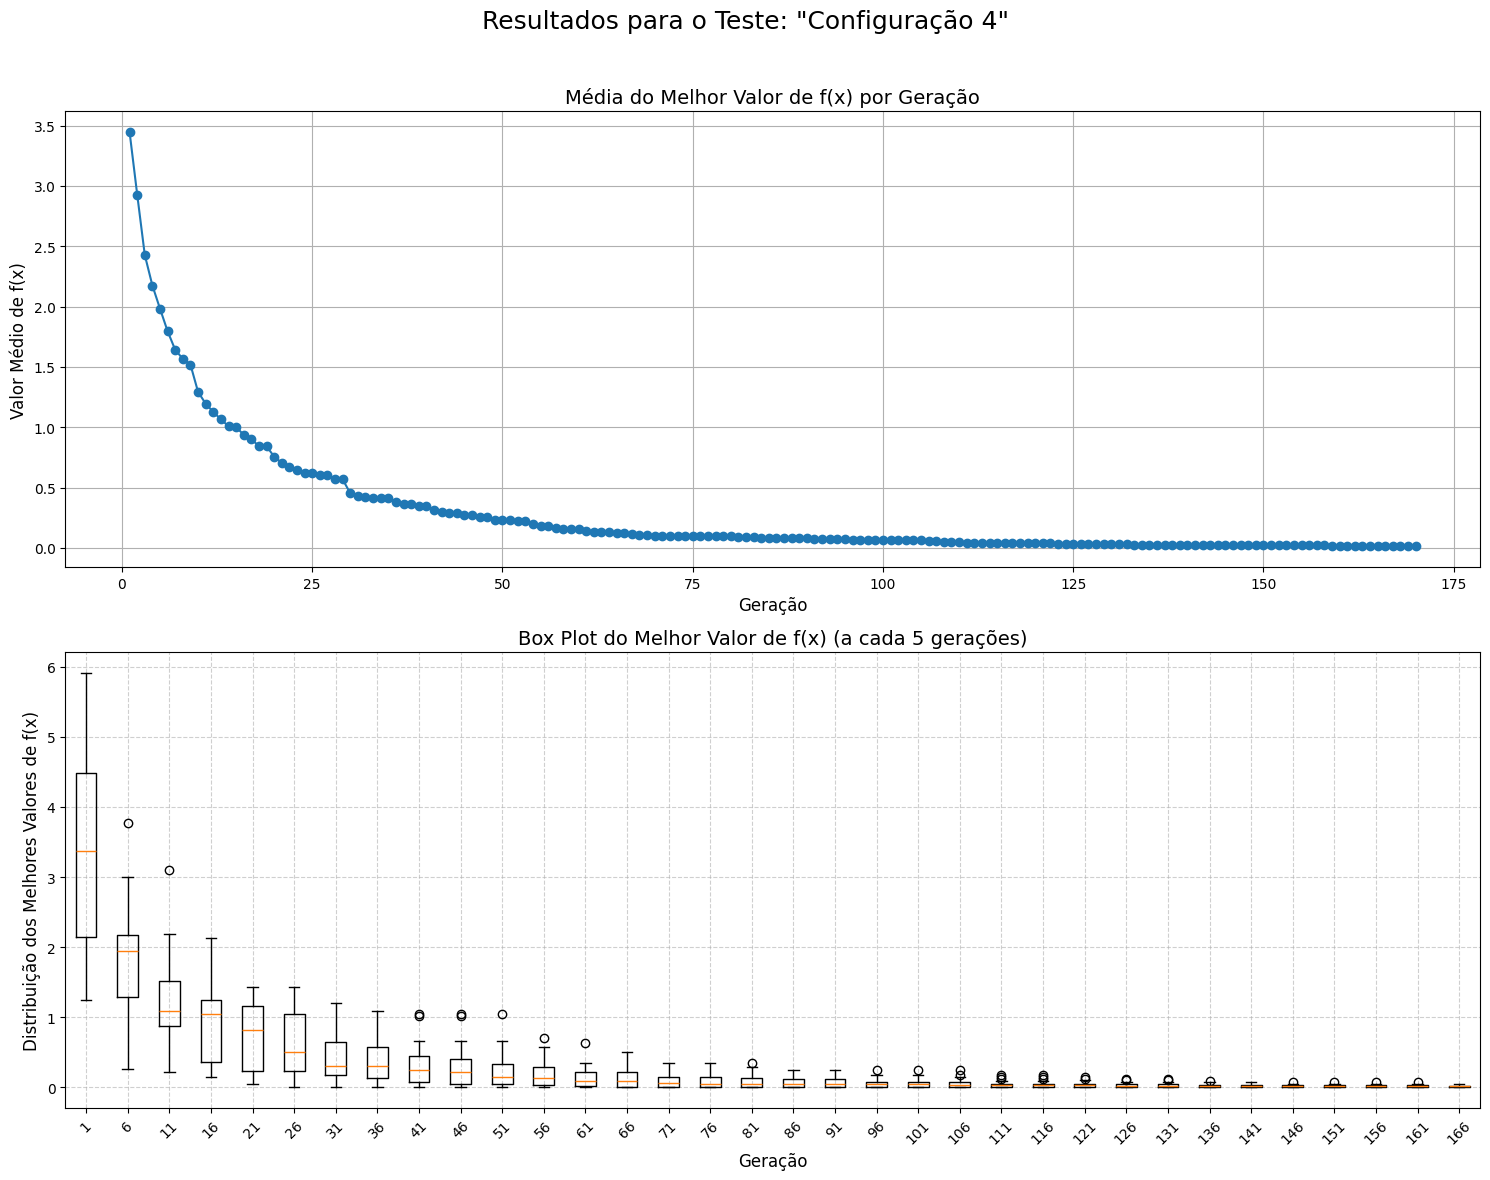

In [188]:
plotar_resultados_experimentos(tabela_resultados_cfg4, "Configuração 4")

### Gráficos comparando a Configuração 1 (65% de crossover) com a Configuração 4 (75% de crossover).

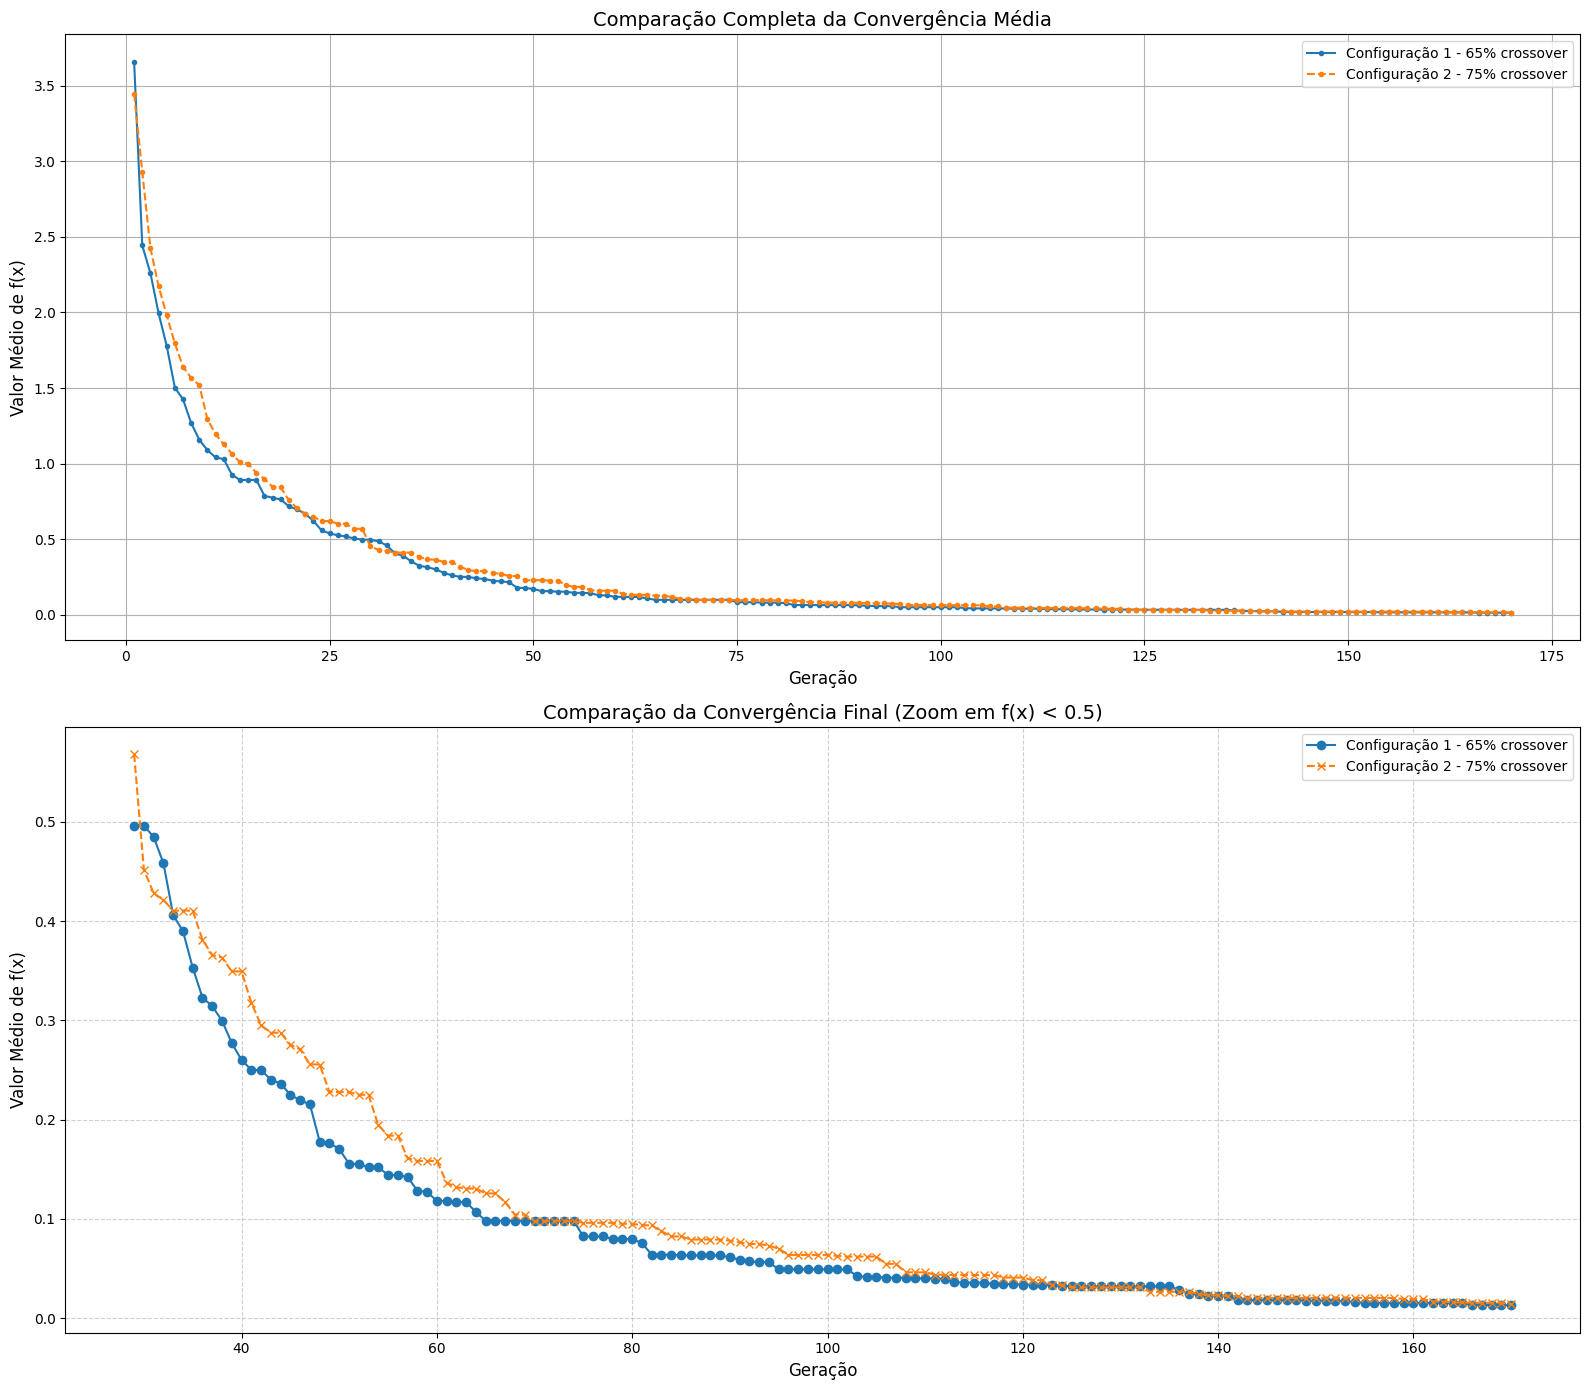

In [189]:
plotar_comparacao_configuracoes(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg4,
    label_config1='Configuração 1 - 65% crossover',
    label_config2='Configuração 2 - 75% crossover'
)

É nítido que em geral 65% de crossover se demonstrou melhor. Além de convergir mais rápido.

Reorganizando dados para o boxplot comparativo...
Gerando o gráfico de Box Plot comparativo...


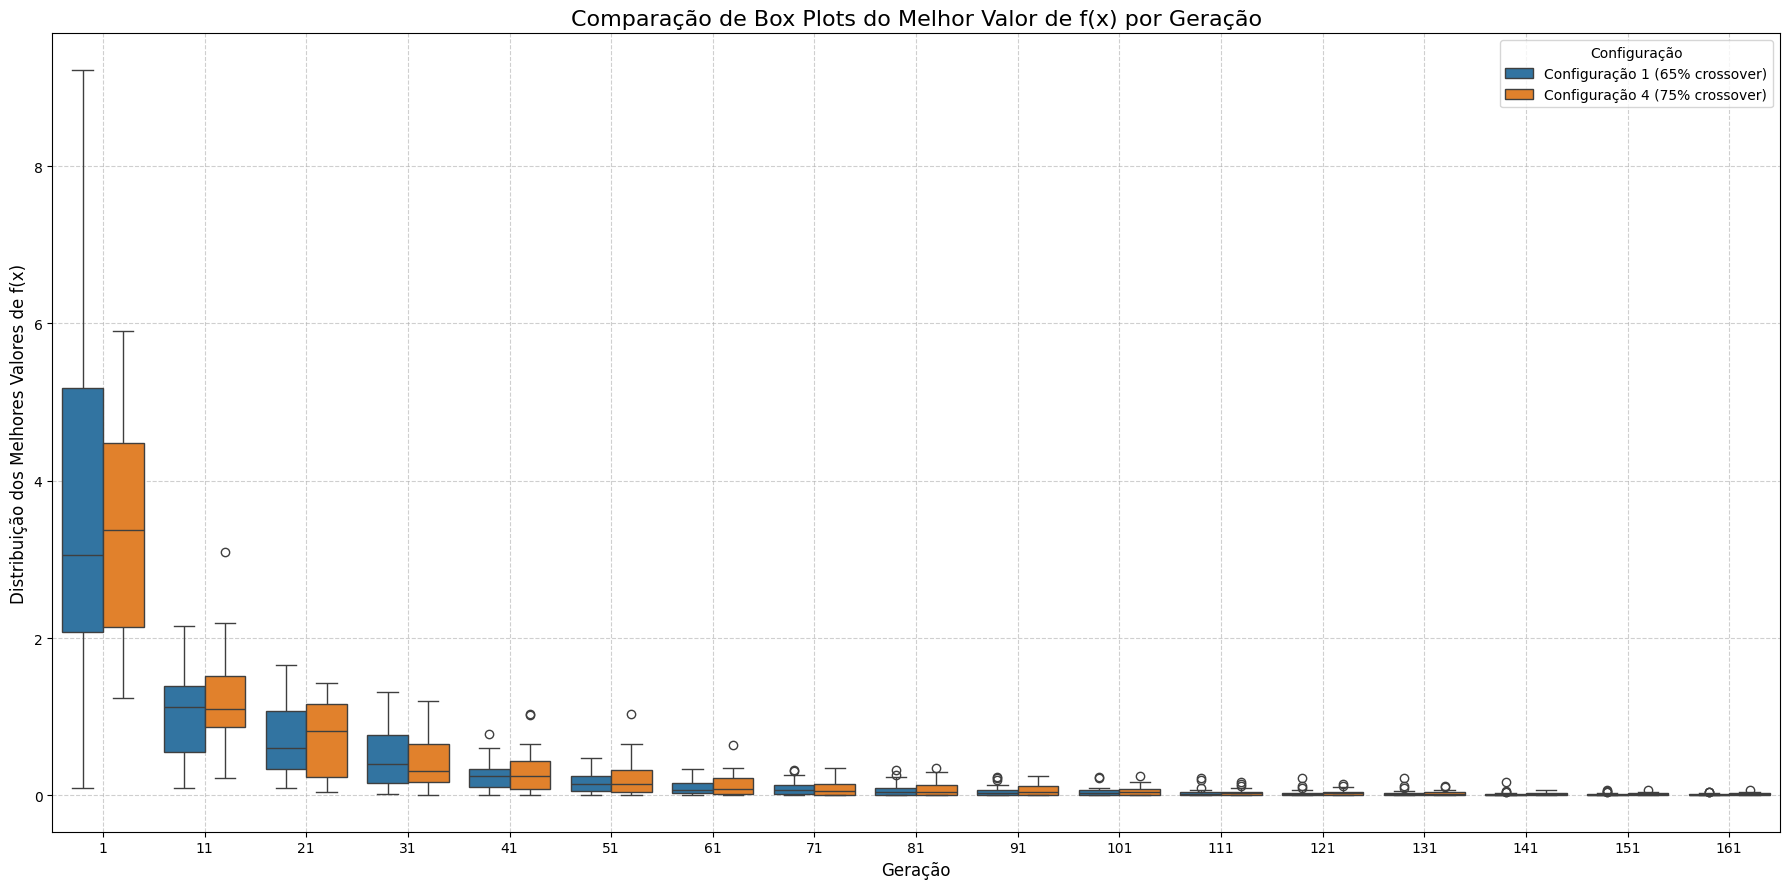

In [190]:
plotar_boxplot_comparativo(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg4,
    label_config1='Configuração 1 (65% crossover)',
    label_config2='Configuração 4 (75% crossover)'
)


O boxplot mostra que 75% de crossover demorou mais para convergir isso é um ponto positivo para 65% de crossover. O boxplot mostra também que 75% gera mais dispersão nos experimentos (perceba da geração 21 até a 111).

####Melhor indivíduo, média e desvio padrão

##### 75% crossover

In [191]:
obter_melhor_resultado_geral(tabela_resultados_cfg4)

{'score': 0.0005609809348037231, 'experimento': 'Experimento_25'}

In [192]:
calcular_media_resultados_finais(tabela_resultados_cfg4)

{'media': np.float64(0.013981926435087359),
 'desvio_padrao': 0.012367520794870237}

##### 65% mutação

In [193]:
obter_melhor_resultado_geral(tabela_resultados_cfg1)

{'score': 0.0005219361530777178, 'experimento': 'Experimento_23'}

In [194]:
calcular_media_resultados_finais(tabela_resultados_cfg1)

{'media': np.float64(0.012961966591675492),
 'desvio_padrao': 0.01335352589958469}

##### 65% de crossover demonstrou um resultado médio e o melhor resultado um pouco melhor.

### Conclusão

Os 2 valores de crossover são uma boa escolha, porém por se manter melhor no final e por chegar mais rapidamente em um valor melhor, prefiro manter 65% de crossover.

---
# O que pode ser feito para melhorar levando em consideração o que já foi testado:

Percebemos que alterar a taxa de crossover e de mutação não teve tanta diferença no algoritmo (na verdade piorou), logo como decisão para mudanças mais bruscas podemos testar:
- [x] Mudar método de crossover
- [x] Mudar método de mutação
- [ ] Diminuir crossover
- [ ] Usar algoritmo diferencial

Obs: Ainda seria válido testar diminuir o valor da mutação, porém por ja ser bem baixa e por questão de tempo, prefiro não testar altera-la e testar uma mutação com algoritmo diferencial (uma mudança mais brusca).

---
# Algoritmo genético - **configuração 5**
Foi alterado em relação à primeira configuração o método de crossover de uniforme para one point

In [242]:
n_dimensao = 2
num_execucoes = 25

algorithm_param_cfg5 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.01,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'one_point',
    'crossover_probability': 0.65,
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
}


### Tabela de resultados

In [243]:
tabela_resultados_cfg5 = executar_experimentos(
    algorithm_param=algorithm_param_cfg5,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)

Iniciando bateria de 25 experimentos com dimensão n=2...


/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


In [244]:
tabela_resultados_cfg5

Experimento_1  Experimento_2  Experimento_3  Experimento_4  \
Geração                                                               
1             2.481077       3.488379       2.209944       1.233903   
2             2.315156       3.077408       2.209944       1.233903   
3             2.315156       3.077408       2.209944       1.233903   
4             2.315156       3.077408       2.166184       1.233903   
5             0.389818       3.077408       2.166184       1.233903   
...                ...            ...            ...            ...   
166           0.007208       0.067287       0.015433       0.019181   
167           0.007208       0.067287       0.000218       0.019181   
168           0.007208       0.067287       0.000218       0.019181   
169           0.007208       0.067287       0.000218       0.019181   
170           0.007208       0.067287       0.000218       0.019181   

         Experimento_5  Experimento_6  Experimento_7  Experimento_8  \
Geração                                                               
1             2.284661       3.360241       2.356189       1.370280   
2             1.102506       3.360241       2.356189       1.370280   
3             1.102506       3.360241       1.087872       1.370280   
4             1.102506       3.360241       1.087872       1.370280   
5             1.102506       1.283524       1.087872       1.370280   
...                ...            ...            ...            ...   
166           0.003933       0.025617       0.001902       0.010848   
167           0.003933       0.025617       0.001902       0.010848   
168           0.003933       0.025617       0.001902       0.010848   
169           0.003933       0.025617       0.001902       0.010848   
170           0.003933       0.025617       0.001902       0.010848   

         Experimento_9  Experimento_10  ...  Experimento_16  Experimento_17  \
Geração                                 ...                                   
1             1.157639        1.319844  ...        2.767063        5.328657   
2             1.157639        1.319844  ...        2.767063        5.328657   
3             1.157639        1.319844  ...        2.767063        3.909253   
4             1.157639        1.319844  ...        2.767063        3.909253   
5             1.157639        1.319844  ...        2.767063        3.909253   
...                ...             ...  ...             ...             ...   
166           0.024900        0.018272  ...        0.007722        0.006645   
167           0.024900        0.018272  ...        0.007722        0.006645   
168           0.005642        0.018272  ...        0.007722        0.006645   
169           0.005642        0.018272  ...        0.007722        0.006645   
170           0.005642        0.018272  ...        0.007722        0.006645   

         Experimento_18  Experimento_19  Experimento_20  Experimento_21  \
Geração                                                                   
1              2.280982        5.004174        2.344631        2.456991   
2              2.280982        5.004174        2.344631        2.456991   
3              2.280982        5.004174        1.210907        2.456991   
4              2.280982        4.438814        1.210907        2.109813   
5              2.280982        2.965613        0.635966        2.109813   
...                 ...             ...             ...             ...   
166            0.025567        0.023483        0.010197        0.004738   
167            0.025567        0.023483        0.010197        0.004738   
168            0.025567        0.023483        0.010197        0.004738   
169            0.025567        0.023483        0.010197        0.004738   
170            0.025567        0.023483        0.010197        0.004738   

         Experimento_22  Experimento_23  Experimento_24  Experimento_25  
Geração                                                                  
1        

### Gráficos do resultado do GA com crossover one point (configuração 5)

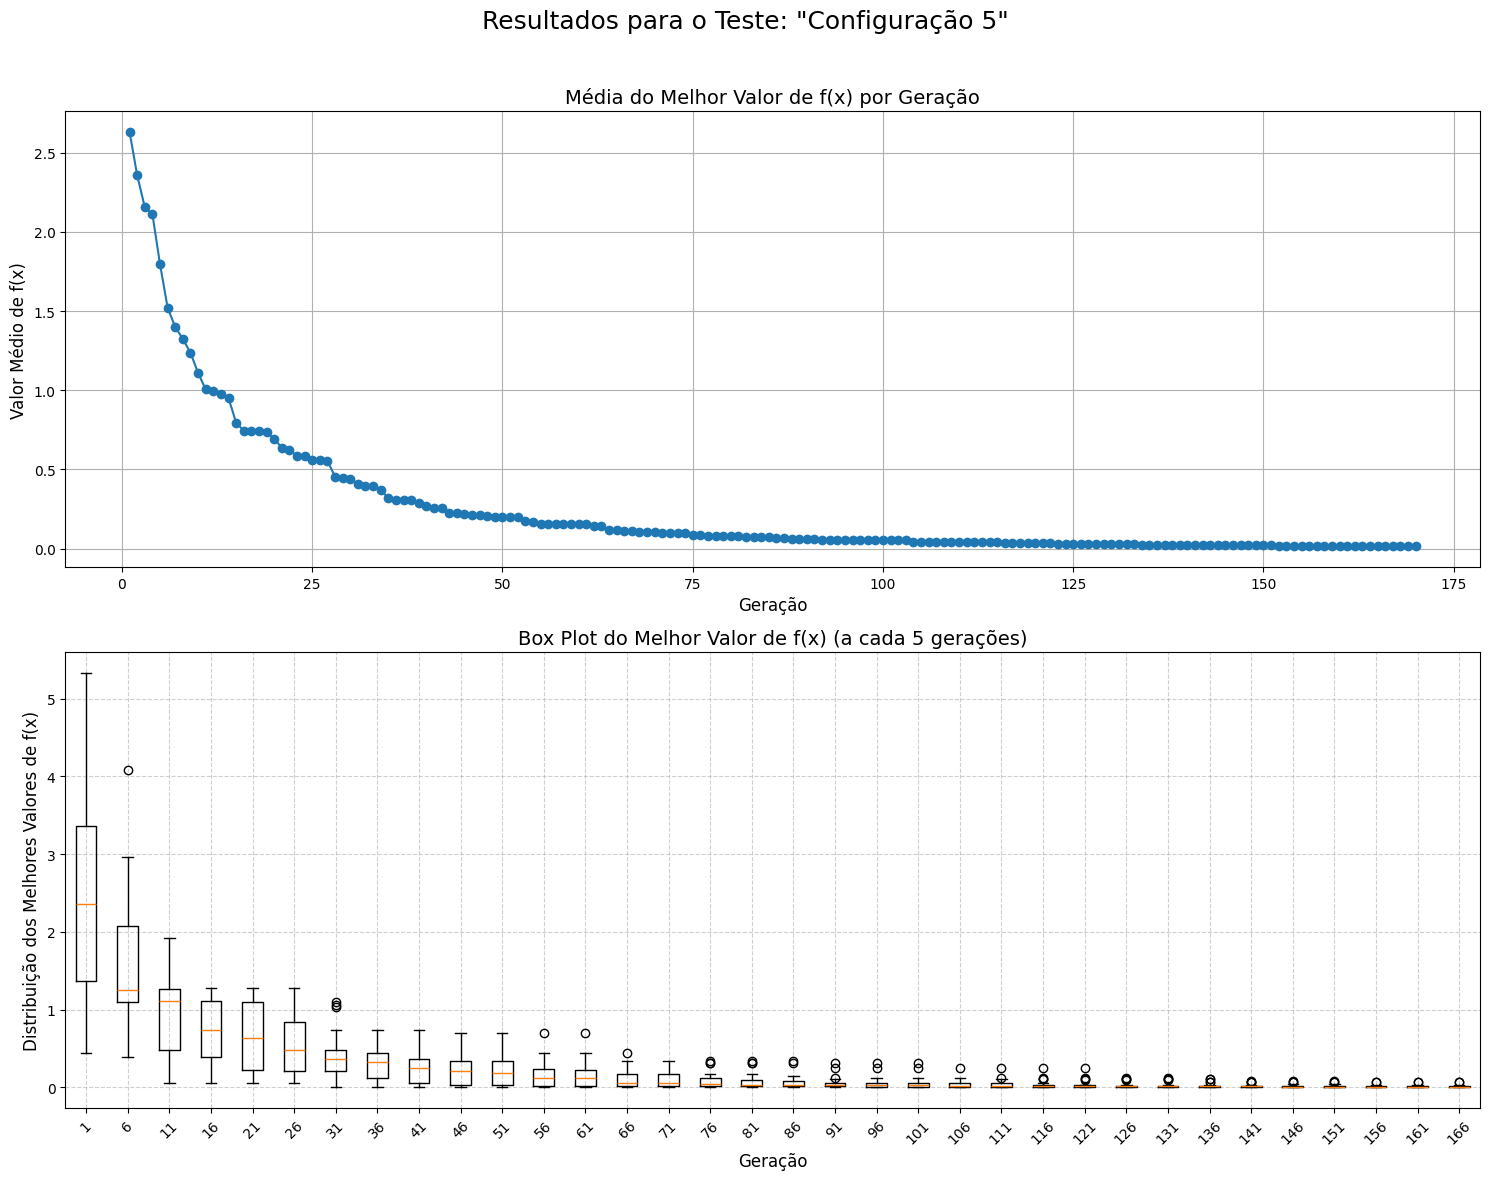

In [245]:
plotar_resultados_experimentos(tabela_resultados_cfg5, "Configuração 5")

### Gráficos comparando a Configuração 1 (uniforme) com a Configuração 5 (one point).

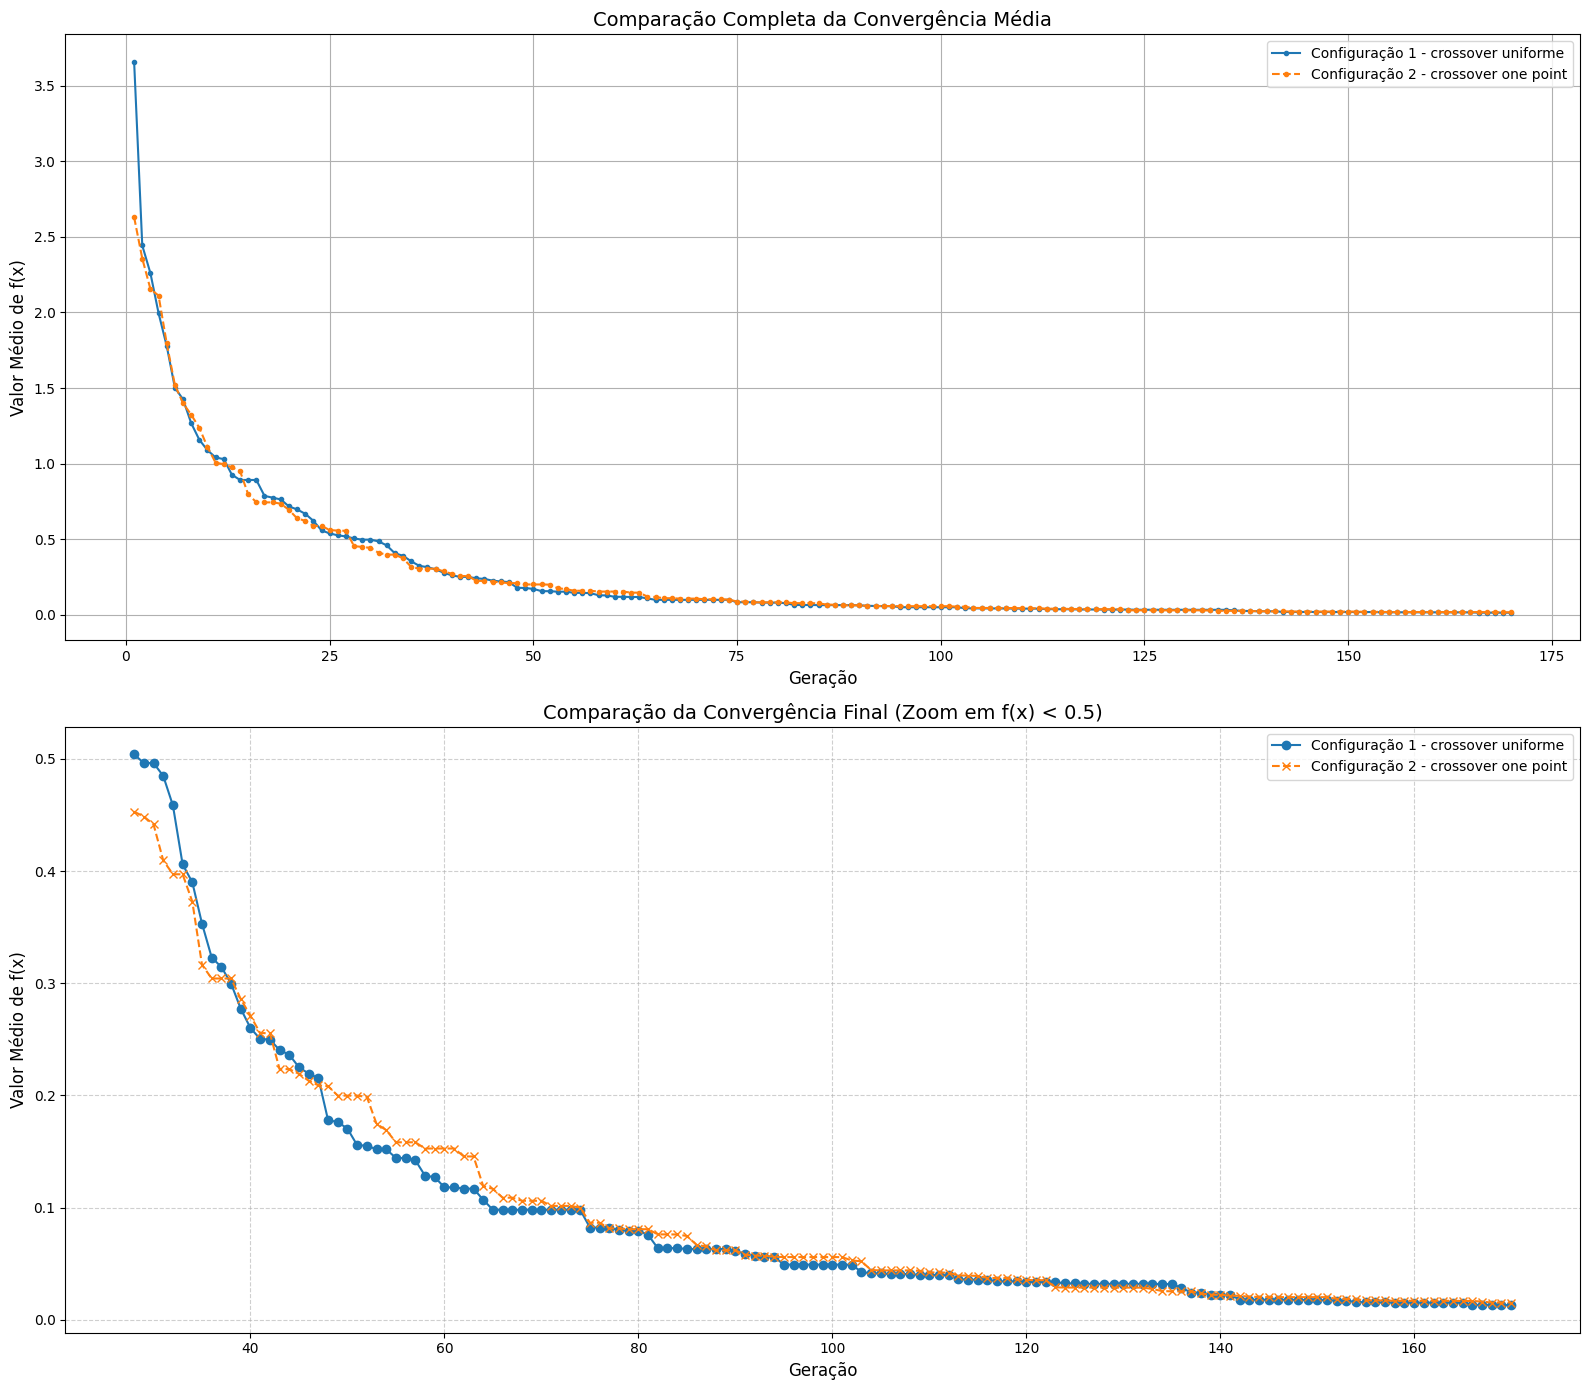

In [246]:
plotar_comparacao_configuracoes(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg5,
    label_config1='Configuração 1 - crossover uniforme',
    label_config2='Configuração 2 - crossover one point'
)

Enquanto o one point demonstrou ser mais rápido para atingir um patamar de qualidade intermediário (f(x) < 0.2), ele estagnou prematuramente num valor superior. Por outro lado, o crossover uniform, embora marginalmente mais lento na fase inicial, provou ser mais robusto na fase de ajuste fino, ultrapassando o one point nas gerações finais e convergindo para um valor médio consistentemente mais próximo de zero.

Reorganizando dados para o boxplot comparativo...
Gerando o gráfico de Box Plot comparativo...


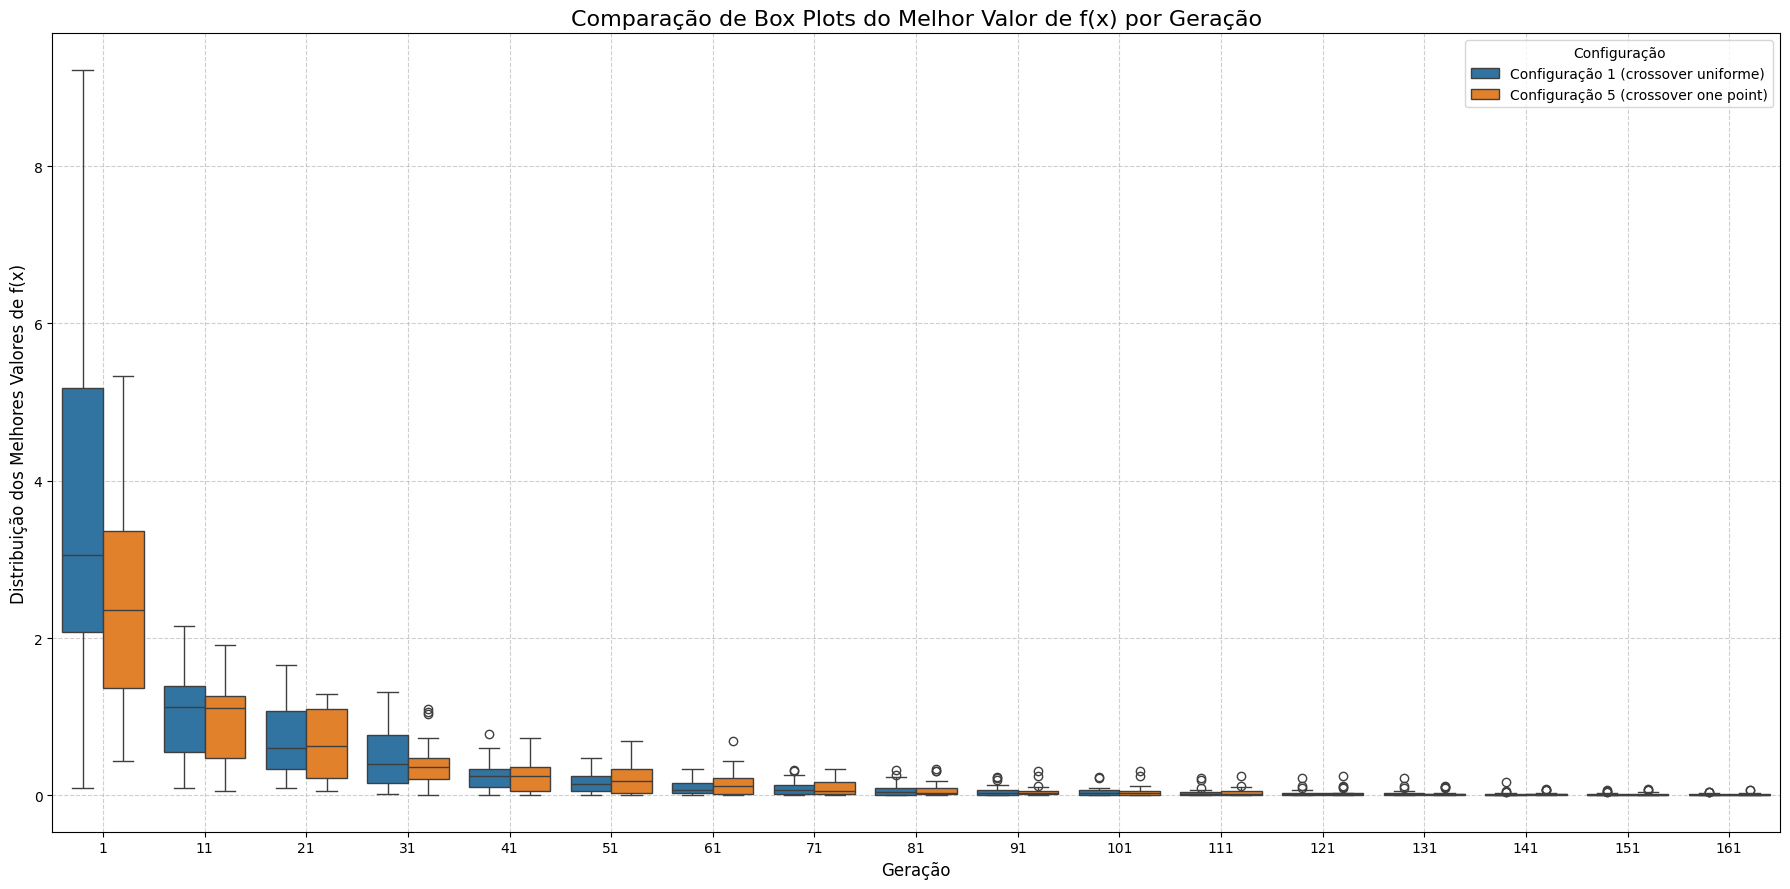

In [248]:
plotar_boxplot_comparativo(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg5,
    label_config1='Configuração 1 (crossover uniforme)',
    label_config2='Configuração 5 (crossover one point)'
)


Em geral a caixa do uniforme é menor e uma cauda menor, logo é mais estável e converge melhor

####Melhor indivíduo, média e desvio padrão

##### crossover one point

In [249]:
obter_melhor_resultado_geral(tabela_resultados_cfg5)

{'score': 0.0002175404886948229, 'experimento': 'Experimento_3'}

In [250]:
calcular_media_resultados_finais(tabela_resultados_cfg5)

{'media': np.float64(0.015323244197637252),
 'desvio_padrao': 0.017401608704785427}

##### crossover uniforme

In [251]:
obter_melhor_resultado_geral(tabela_resultados_cfg1)

{'score': 0.0005219361530777178, 'experimento': 'Experimento_23'}

In [252]:
calcular_media_resultados_finais(tabela_resultados_cfg1)

{'media': np.float64(0.012961966591675492),
 'desvio_padrao': 0.01335352589958469}

##### crossover uniforme demonstrou ser mais estável (menor desvio padrão) e menor valor médio, logo nesse quesito ele é melhor.

### Conclusão

Escolher crossover uniforme por convergir melhor no final e ter um valor médio melhor.

---
# Algoritmo genético - **configuração 6**
Foi alterado em relação à primeira configuração o método de mutação para uniforme (totalmente aleatório).

In [267]:
n_dimensao = 2
num_execucoes = 25

algorithm_param_cfg6 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.08,
    'mutation_type': 'uniform_by_x',
    'crossover_type': 'uniform',
    'crossover_probability': 0.65,
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
}


### Tabela de resultados

In [268]:
tabela_resultados_cfg6 = executar_experimentos(
    algorithm_param=algorithm_param_cfg6,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)

Iniciando bateria de 25 experimentos com dimensão n=2...


/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(


In [269]:
tabela_resultados_cfg6

Experimento_1  Experimento_2  Experimento_3  Experimento_4  \
Geração                                                               
1             2.223717       4.165574       3.891797       4.057415   
2             2.223717       2.027559       3.891797       2.112437   
3             2.223717       2.027559       3.891797       2.112437   
4             2.223717       2.027559       3.891797       2.112437   
5             1.205198       0.961983       3.891797       1.993945   
...                ...            ...            ...            ...   
166           0.008777       0.022192       0.010713       0.017145   
167           0.008777       0.022192       0.010713       0.017145   
168           0.008777       0.022192       0.010713       0.017145   
169           0.008777       0.022192       0.010713       0.017145   
170           0.008777       0.022192       0.010713       0.017145   

         Experimento_5  Experimento_6  Experimento_7  Experimento_8  \
Geração                                                               
1             3.521236       2.889280       1.188986       2.976436   
2             3.521236       2.889280       1.188986       2.976436   
3             3.521236       2.889280       1.188986       2.976436   
4             3.518256       2.402201       1.188986       2.976436   
5             2.215704       2.402201       1.188986       0.408189   
...                ...            ...            ...            ...   
166           0.024876       0.001879       0.067840       0.013932   
167           0.024876       0.001879       0.067840       0.013932   
168           0.024876       0.001879       0.067840       0.013932   
169           0.024876       0.001879       0.067840       0.013932   
170           0.024876       0.001879       0.067840       0.013932   

         Experimento_9  Experimento_10  ...  Experimento_16  Experimento_17  \
Geração                                 ...                                   
1             2.476588        4.816571  ...        3.311609        3.522073   
2             2.476588        0.941663  ...        0.835973        3.522073   
3             2.476588        0.941663  ...        0.835973        2.624511   
4             2.476588        0.941663  ...        0.835973        2.624511   
5             2.476588        0.941663  ...        0.835973        1.666840   
...                ...             ...  ...             ...             ...   
166           0.011941        0.007181  ...        0.003444        0.005127   
167           0.011941        0.007181  ...        0.003444        0.005127   
168           0.011941        0.007181  ...        0.003444        0.005127   
169           0.011941        0.007181  ...        0.003444        0.005127   
170           0.011941        0.007181  ...        0.003444        0.005127   

         Experimento_18  Experimento_19  Experimento_20  Experimento_21  \
Geração                                                                   
1              5.114465        5.016137        2.599492        4.187873   
2              2.271251        3.171916        2.599492        4.187873   
3              2.271251        3.171916        2.599492        1.682476   
4              2.271251        2.315714        2.599492        1.682476   
5              1.814570        2.315714        2.599492        1.682476   
...                 ...             ...             ...             ...   
166            0.013631        0.016651        0.005097        0.030745   
167            0.013631        0.016651        0.005097        0.030745   
168            0.013631        0.016651        0.005097        0.030745   
169            0.013631        0.016651        0.005097        0.030745   
170            0.013631        0.016651        0.005097        0.030745   

         Experimento_22  Experimento_23  Experimento_24  Experimento_25  
Geração                                                                  
1        

### Gráficos do resultado do GA com crossover 50% (configuração 5)

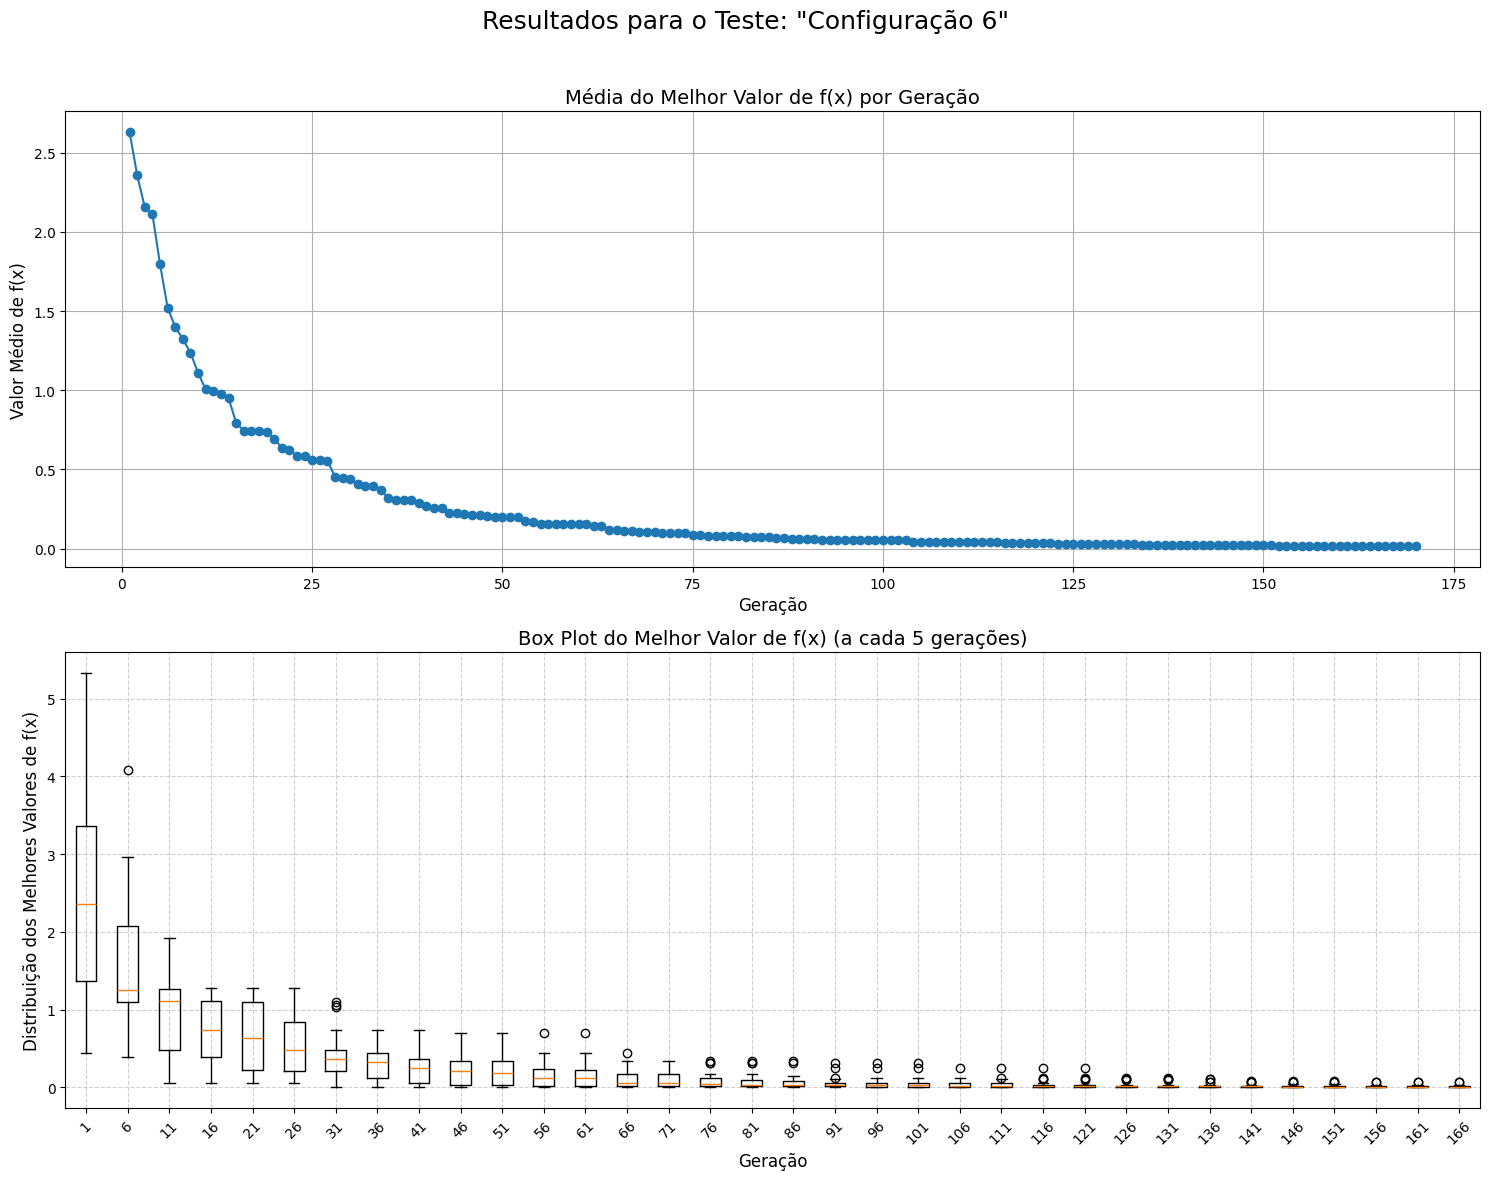

In [270]:
plotar_resultados_experimentos(tabela_resultados_cfg5, "Configuração 6")

### Gráficos comparando a Configuração 1 (65% de crossover) com a Configuração 5 (50% de crossover).

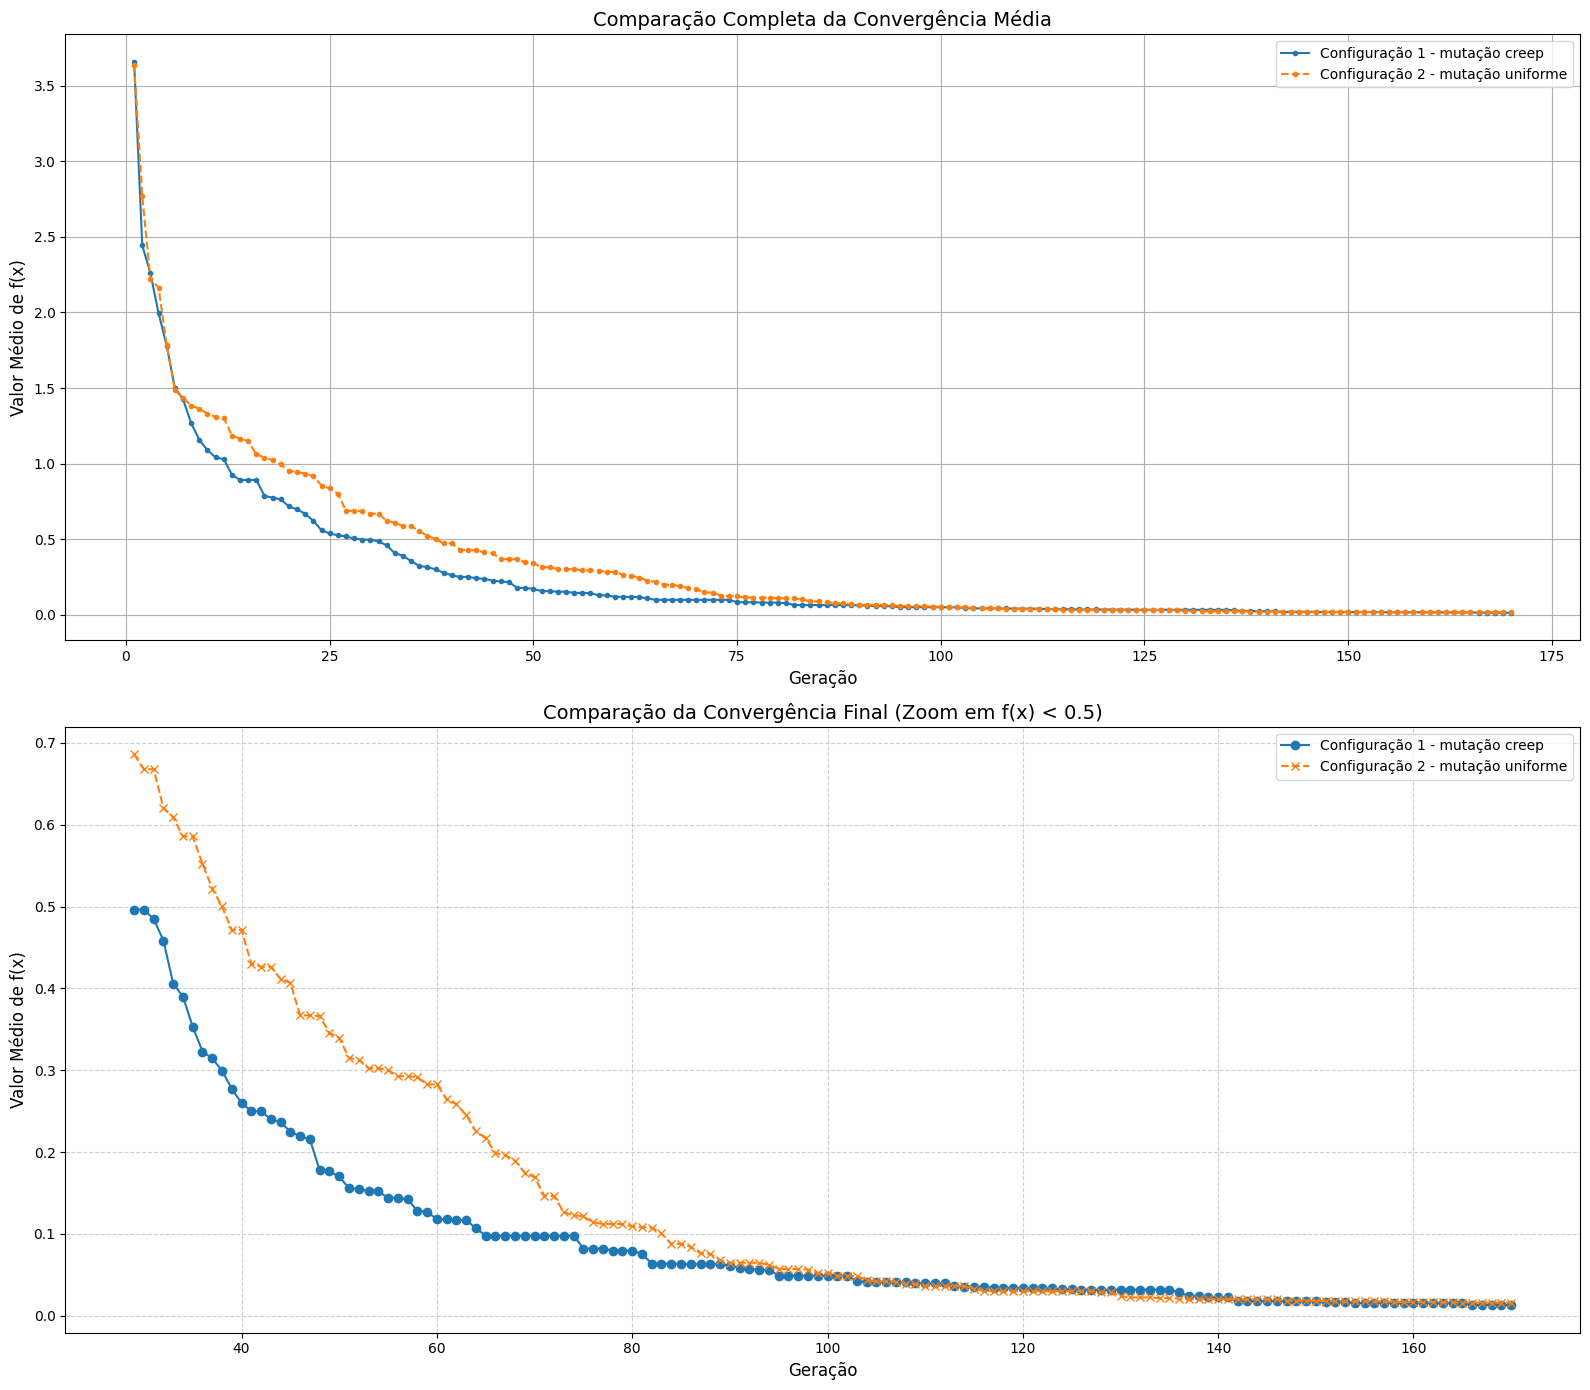

In [271]:
plotar_comparacao_configuracoes(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg6,
    label_config1='Configuração 1 - mutação creep',
    label_config2='Configuração 2 - mutação uniforme'
)

A mutação uniforme se demonstra menos efetiva, onde a mutação com creep se mostrou melhor em praticamente todas gerações

Reorganizando dados para o boxplot comparativo...
Gerando o gráfico de Box Plot comparativo...


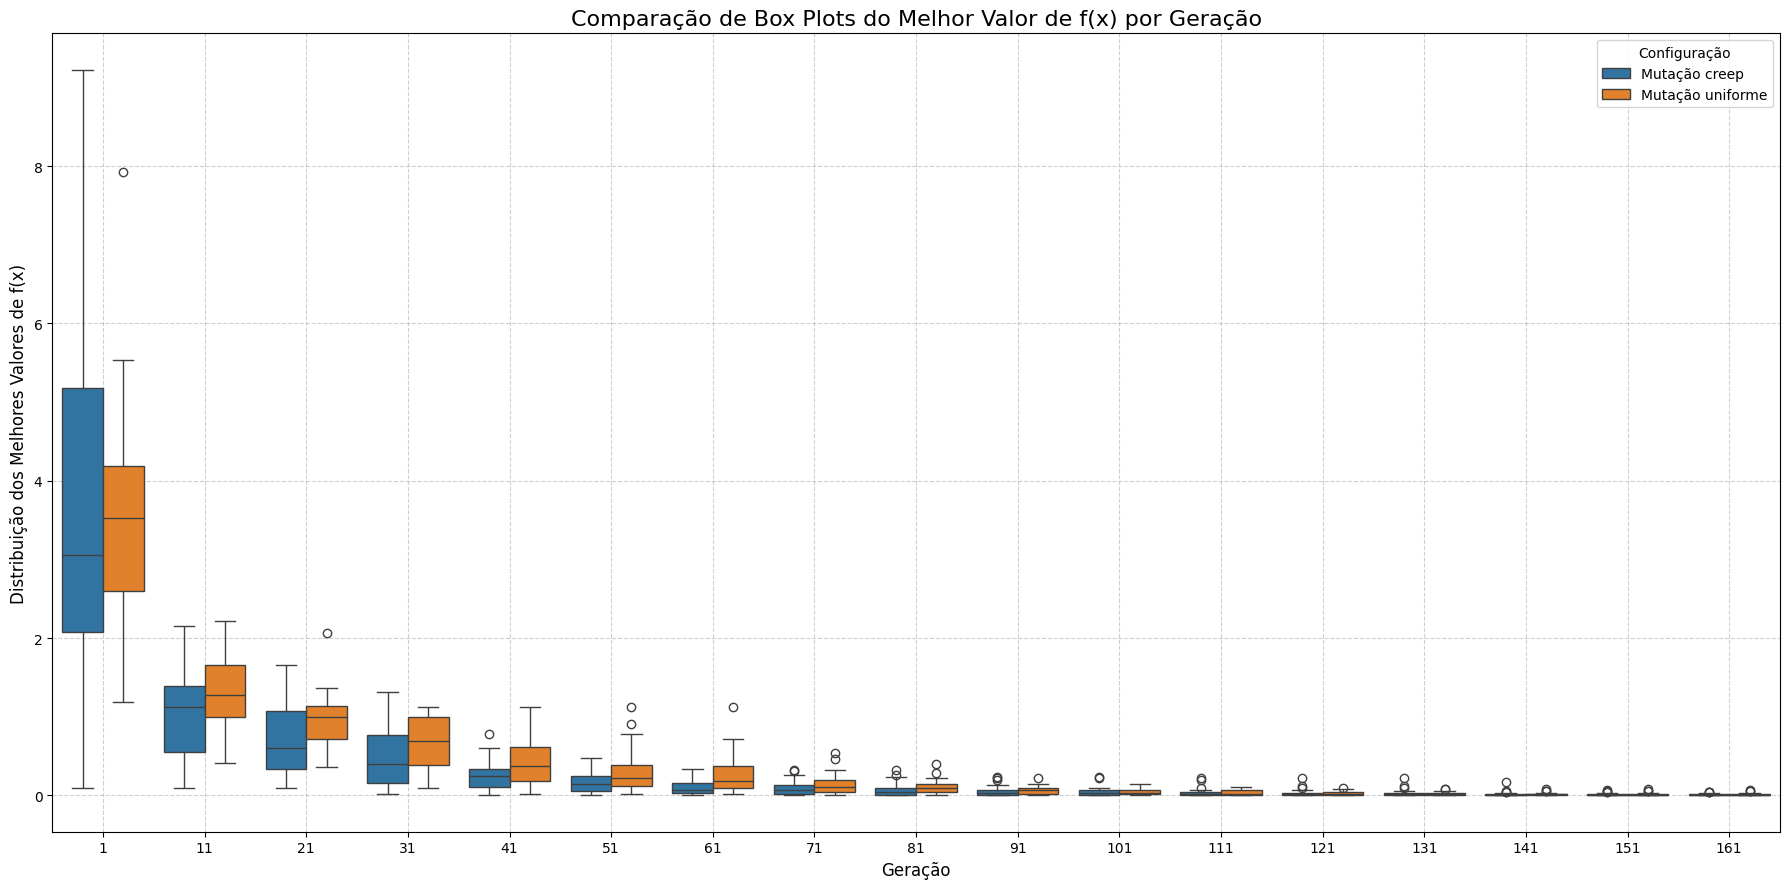

In [272]:
plotar_boxplot_comparativo(
    df_config1=tabela_resultados_cfg1,
    df_config2=tabela_resultados_cfg6,
    label_config1='Mutação creep',
    label_config2='Mutação uniforme'
)


O boxplot confirma que a mutação creep é melhor além de ser mais estável.

####Melhor indivíduo, média e desvio padrão

##### Mutação uniforme

In [277]:
obter_melhor_resultado_geral(tabela_resultados_cfg6)

{'score': 0.0006973730433159631, 'experimento': 'Experimento_24'}

In [278]:
calcular_media_resultados_finais(tabela_resultados_cfg6)

{'media': np.float64(0.01616007543486191),
 'desvio_padrao': 0.018355640984779525}

##### Mutação gaussiana (creep)

In [279]:
obter_melhor_resultado_geral(tabela_resultados_cfg1)

{'score': 0.0005219361530777178, 'experimento': 'Experimento_23'}

In [280]:
calcular_media_resultados_finais(tabela_resultados_cfg1)

{'media': np.float64(0.012961966591675492),
 'desvio_padrao': 0.01335352589958469}

##### Mutação creep teve um desempenho melhor, tendo uma média e desvio padrão menores. O menor de todos experimentos dessa configuração também é menor que o do uniforme.

### Conclusão

A escolha é óbvia, em todos os gráficos e métricas a mutação creep (gaussian_by_x) é melhor/.

# Poda de gerações

# Evolução diferencial

In [281]:
import time
import numpy as np
from geneticalgorithm2 import GeneticAlgorithm2 as ga
from scipy.optimize import differential_evolution

# =======================================================
# 1. DEFINIÇÃO DO PROBLEMA (FUNÇÃO RASTRIGIN)
# =======================================================
A = 10

def rastrigin_function(X):
    n_dim = len(X)
    termo_quadratico = np.sum(X**2)
    termo_cosseno = np.sum(A * np.cos(2 * np.pi * X))
    return A * n_dim + termo_quadratico - termo_cosseno

# =======================================================
# 2. CONFIGURAÇÃO E EXECUÇÃO DO SEU MELHOR AG
# =======================================================
print("--- Executando o Algoritmo Genético (Configuração 1) ---")

n_dimensao = 2 # Para uma comparação justa, usaremos n=2 em ambos

algorithm_param_cfg1 = {
    'max_num_iteration': 170,
    'population_size': 300,
    'mutation_probability': 0.01,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
}

# Medindo o tempo do AG
start_time_ga = time.time()

model_ga = ga(
    dimension=n_dimensao,
    variable_type='real',
    variable_boundaries=np.array([[-5.12, 5.12]] * n_dimensao),
    algorithm_parameters=algorithm_param_cfg1
)
model_ga.run(
    function=rastrigin_function,
    no_plot=True,
    progress_bar_stream=None,
    disable_printing=True
)

end_time_ga = time.time()
tempo_ga = end_time_ga - start_time_ga
resultado_ga = model_ga.result

# =======================================================
# 3. CONFIGURAÇÃO E EXECUÇÃO DA EVOLUÇÃO DIFERENCIAL
# =======================================================
print("\n--- Executando a Evolução Diferencial ---")

# A SciPy usa uma lista de tuplas para os limites
bounds = [(-5.12, 5.12)] * n_dimensao

# O popsize da SciPy é um multiplicador. Para 300 indivíduos com n=2, popsize = 150.
popsize_de = 300 // n_dimensao

# Medindo o tempo da DE
start_time_de = time.time()

resultado_de = differential_evolution(
    func=rastrigin_function,
    bounds=bounds,
    maxiter=170,           # Equivalente ao max_num_iteration
    popsize=popsize_de,    # Equivalente ao population_size
    strategy='best1bin',   # Estratégia padrão e muito eficaz
    tol=0.0001             # Critério de tolerância para parada antecipada
)

end_time_de = time.time()
tempo_de = end_time_de - start_time_de

# =======================================================
# 4. COMPARAÇÃO DOS RESULTADOS
# =======================================================
print("\n" + "="*50)
print("COMPARAÇÃO FINAL: AG vs. Evolução Diferencial (DE)")
print("="*50)

print("\nAlgoritmo Genético (GA):")
print(f"  - Melhor Score (f(x)): {resultado_ga.score:.8f}")
print(f"  - Melhor Solução (X): {resultado_ga.variable}")
print(f"  - Tempo de Execução: {tempo_ga:.4f} segundos")

print("\nEvolução Diferencial (DE):")
print(f"  - Melhor Score (f(x)): {resultado_de.fun:.8f}")
print(f"  - Melhor Solução (X): {resultado_de.x}")
print(f"  - Tempo de Execução: {tempo_de:.4f} segundos")
print(f"  - Gerações Utilizadas: {resultado_de.nit}")
print("="*50)

--- Executando o Algoritmo Genético (Configuração 1) ---

--- Executando a Evolução Diferencial ---

COMPARAÇÃO FINAL: AG vs. Evolução Diferencial (DE)

Algoritmo Genético (GA):
  - Melhor Score (f(x)): 0.55441758
  - Melhor Solução (X): [ 0.00704906 -0.0526298 ]
  - Tempo de Execução: 2.0626 segundos

Evolução Diferencial (DE):
  - Melhor Score (f(x)): 0.00000000
  - Melhor Solução (X): [-1.35375785e-09 -1.18038315e-09]
  - Tempo de Execução: 6.2443 segundos
  - Gerações Utilizadas: 67


Executando experimentos com Algoritmo Genético...

Executando experimentos com Evolução Diferencial...

Gerando gráfico de comparação...


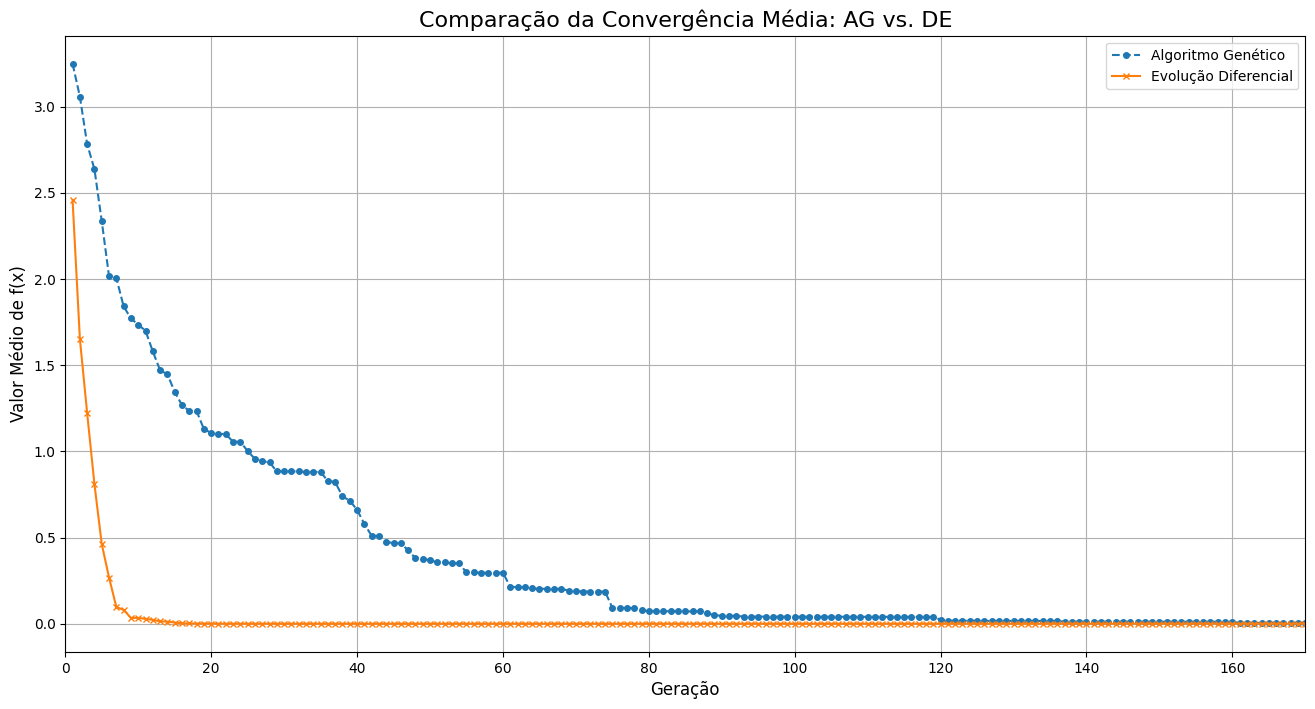

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from geneticalgorithm2 import GeneticAlgorithm2 as ga
from scipy.optimize import differential_evolution

# =======================================================
# 1. FUNÇÕES DO PROBLEMA E DE ANÁLISE
# =======================================================
A = 10

def rastrigin_function(X):
    n_dim = len(X)
    return A * n_dim + np.sum(X**2 - A * np.cos(2 * np.pi * X))

# (Inclua aqui as suas funções 'executar_experimentos' para o AG,
# 'plotar_resultados_experimentos', etc., que já criamos)

def executar_experimentos_ag(algorithm_param, n_dim, num_experimentos=10):
    resultados_dict = {}
    varbound = np.array([[-5.12, 5.12]] * n_dim)
    for i in range(1, num_experimentos + 1):
        model = ga(dimension=n_dim, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
        model.run(function=rastrigin_function, no_plot=True, progress_bar_stream=None, disable_printing=True)
        resultados_dict[f"Experimento_{i}"] = model.report
    df_resultados = pd.DataFrame(resultados_dict)
    df_resultados.index = np.arange(1, len(df_resultados) + 1)
    df_resultados.index.name = "Geração"
    return df_resultados

def executar_experimentos_de(de_params, n_dim, num_experimentos=10):
    resultados_dict = {}
    bounds = [(-5.12, 5.12)] * n_dim
    for i in range(1, num_experimentos + 1):
        convergence_history = []
        def callback_de(intermediate_result):
            convergence_history.append(intermediate_result.fun)
        differential_evolution(func=rastrigin_function, bounds=bounds, callback=callback_de, **de_params)
        resultados_dict[f"Experimento_{i}"] = convergence_history
    max_len = de_params.get('maxiter', 1) * (de_params.get('popsize', 15)) # Aprox.
    max_len = max(max(len(v) for v in resultados_dict.values()), de_params['maxiter']+1)
    for k, v in resultados_dict.items():
        while len(v) < max_len:
            v.append(v[-1])
    df_resultados = pd.DataFrame(resultados_dict)
    df_resultados.index = np.arange(1, len(df_resultados) + 1)
    df_resultados.index.name = "Geração"
    return df_resultados

# =======================================================
# 2. CONFIGURAÇÃO E EXECUÇÃO DOS TESTES
# =======================================================
n_dimensao = 2
num_execucoes = 10

# --- Parâmetros para o AG ---
params_ag = {
    'max_num_iteration': 170, 'population_size': 300, 'mutation_probability': 0.1,
    'mutation_type': 'uniform_by_x', 'crossover_type': 'uniform', 'elit_ratio': 0.10,
    'parents_portion': 0.9, 'selection_type': 'tournament',
}

# --- Parâmetros para a DE (com a correção no 'tol') ---
params_de = {
    'maxiter': 170,
    'popsize': 300 // n_dimensao,
    'strategy': 'best1bin',
    'tol': 0,  # <-- CORREÇÃO APLICADA AQUI: força a execução por todas as 170 iterações
}

# --- Execução de ambos os algoritmos ---
print("Executando experimentos com Algoritmo Genético...")
tabela_ag = executar_experimentos_ag(params_ag, n_dimensao, num_execucoes)

print("\nExecutando experimentos com Evolução Diferencial...")
tabela_de = executar_experimentos_de(params_de, n_dimensao, num_execucoes)

# =======================================================
# 3. GRÁFICO DE COMPARAÇÃO DIRETA
# =======================================================
print("\nGerando gráfico de comparação...")
media_ag = tabela_ag.mean(axis=1)
media_de = tabela_de.mean(axis=1)

plt.figure(figsize=(16, 8))
plt.plot(media_ag.index, media_ag.values, marker='o', markersize=4, linestyle='--', label='Algoritmo Genético')
plt.plot(media_de.index, media_de.values, marker='x', markersize=4, linestyle='-', label='Evolução Diferencial')
plt.title('Comparação da Convergência Média: AG vs. DE', fontsize=16)
plt.xlabel('Geração', fontsize=12)
plt.ylabel('Valor Médio de f(x)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xlim(0, 170) # Garante que o eixo X vá até 170
plt.show()